# Applied Machine Learning 
## Homework 1 Fix

### part 5 - Added learning rates to SGD and plotted the loss vs epochs graphs
### part 6 - added ridge, lasso, etc  for polynomial regressor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

# Question 1

In [2]:
# Loading the dataset as a dataframe

happiness_df = pd.read_csv('happiness_data.csv')
happiness_df.head(20)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008        3.724               7.370           0.451   
1   Afghanistan  2009        4.402               7.540           0.552   
2   Afghanistan  2010        4.758               7.647           0.539   
3   Afghanistan  2011        3.832               7.620           0.521   
4   Afghanistan  2012        3.783               7.705           0.521   
5   Afghanistan  2013        3.572               7.725           0.484   
6   Afghanistan  2014        3.131               7.718           0.526   
7   Afghanistan  2015        3.983               7.702           0.529   
8   Afghanistan  2016        4.220               7.697           0.559   
9   Afghanistan  2017        2.662               7.697           0.491   
10  Afghanistan  2018        2.694               7.692           0.508   
11  Afghanistan  2019        2.375               7.697           0.420   
12      Albania  2007        4.634               9.142           0.821   
13      Albania  2009        5.485               9.262           0.833   
14      Albania  2010        5.269               9.303           0.733   
15      Albania  2011        5.867               9.331           0.759   
16      Albania  2012        5.510               9.347           0.785   
17      Albania  2013        4.551               9.359           0.759   
18      Albania  2014        4.814               9.378           0.626   
19      Albania  2015        4.607               9.403           0.639   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                              50.80                         0.718   
1                              51.20                         0.679   
2                              51.60                         0.600   
3                              51.92                         0.496   
4                              52.24                         0.531   
5                              52.56                         0.578   
6                              52.88                         0.509   
7                              53.20                         0.389   
8                              53.00                         0.523   
9                              52.80                         0.427   
10                             52.60                         0.374   
11                             52.40                         0.394   
12                             65.80                         0.529   
13                             66.20                         0.525   
14                             66.40                         0.569   
15                             66.68                         0.487   
16                             66.96                         0.602   
17                             67.24                         0.632   
18                             67.52                         0.735   
19                             67.80                         0.704   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
0        0.168                      0.882            0.518            0.258  
1        0.190                      0.850            0.584            0.237  
2        0.121                      0.707            0.618            0.275  
3        0.162                      0.731            0.611            0.267  
4        0.236                      0.776            0.710            0.268  
5        0.061                      0.823            0.621            0.273  
6        0.104                      0.871            0.532            0.375  
7        0.080                      0.881            0.554            0.339  
8        0.042                      0.793            0.565            0.348  
9       -0.121                      0.954            0.496            0.371  
10      -0.094                      0.928            0.424            0.405  
11      -0.108                      0.924

### Part 1

#### Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [3]:
# Extracting the number of rows and columns of the dataframe

print(len(happiness_df))
print(len(happiness_df.columns))

1949
11


In [4]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


#### Answer:- The dataframe has a size of 1949 rows and 11 columns i.e. there are 1949 data entries and 11 attributes/features. There are 9 continuous valued attributes which are ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'] and 2 categorical attributes which are ['Country name', 'year']. Continuous values are those which can assume an infinite number of values within a given range. Categorical values are those which can assume values only from a given set. Depending on the context and dataset, 'year' can be treated as categorical or continuous.

### Part 2

#### Display the statistical values for each of the attributes, along with visualizations (e.g. histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [5]:
happiness_df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

In [6]:
happiness_df["Country name"].value_counts()

Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64

In [7]:
# Calculating the mean of each attribute for each unique country

happiness_df[["Country name", "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
             "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", 
              "Negative affect"]].groupby("Country name").mean()

Life Ladder  Log GDP per capita  Social support  \
Country name                                                    
Afghanistan      3.594667            7.650833        0.508417   
Albania          5.019385            9.384385        0.716231   
Algeria          5.389875            9.328875        0.803571   
Angola           4.420250            8.990000        0.738250   
Argentina        6.310133           10.033800        0.904400   
...                   ...                 ...             ...   
Venezuela        6.019867            9.480083        0.910133   
Vietnam          5.305857            8.655286        0.829231   
Yemen            3.912250            8.102700        0.739833   
Zambia           4.551714            8.066857        0.737714   
Zimbabwe         3.882600            7.850333        0.799400   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country name                                                                   
Afghanistan                          52.266667                      0.518167   
Albania                              67.546154                      0.662923   
Algeria                              65.290000                      0.519167   
Angola                               53.550000                      0.456250   
Argentina                            67.900000                      0.768200   
...                                        ...                           ...   
Venezuela                            65.958667                      0.666400   
Vietnam                              66.928571                      0.882455   
Yemen                                54.866667                      0.622417   
Zambia                               51.707143                      0.756786   
Zimbabwe                             50.233333                      0.587933   

              Generosity  Perceptions of corruption  Positive affect  \
Country name                                                           
Afghanistan     0.070083                   0.843333         0.548667   
Albania        -0.082692                   0.869385         0.653846   
Algeria        -0.144333                   0.691000         0.608429   
Angola         -0.088250                   0.866750         0.613500   
Argentina      -0.159867                   0.842067         0.833467   
...                  ...                        ...              ...   
Venezuela      -0.164182                   0.795200         0.801800   
Vietnam         0.002615                   0.784700         0.645385   
Yemen          -0.126200                   0.824667         0.530500   
Zambia          0.013357                   0.828857         0.720643   
Zimbabwe       -0.083000                   0.844200         0.717733   

              Negative affect  
Country name                   
Afghanistan          0.326500  
Albania              0.299231  
Algeria              0.262286  
Angola               0.351250  
Argentina            0.284000  
...                       ...  
Venezuela            0.260067  
Vietnam              0.206615  
Yemen                0.293583  
Zambia               0.294357  
Zimbabwe             0.224400  

[166 rows x 9 columns]

In [8]:
# Calculating the median of each attribute for each unique country

happiness_df[["Country name", "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
             "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", 
              "Negative affect"]].groupby("Country name").median()

Life Ladder  Log GDP per capita  Social support  \
Country name                                                    
Afghanistan        3.7535              7.6970          0.5210   
Albania            4.9950              9.3780          0.7100   
Algeria            5.3290              9.3360          0.8070   
Angola             4.1485              8.9985          0.7380   
Argentina          6.4240             10.0510          0.9020   
...                   ...                 ...             ...   
Venezuela          6.2580              9.5495          0.9110   
Vietnam            5.2960              8.6470          0.8320   
Yemen              4.0145              8.2250          0.7415   
Zambia             4.7770              8.1240          0.7525   
Zimbabwe           3.7350              7.9500          0.7990   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country name                                                                   
Afghanistan                              52.48                        0.5160   
Albania                                  67.52                        0.7040   
Algeria                                  65.32                        0.5565   
Angola                                   53.55                        0.4330   
Argentina                                67.84                        0.7470   
...                                        ...                           ...   
Venezuela                                65.82                        0.6420   
Vietnam                                  66.90                        0.8890   
Yemen                                    54.30                        0.6410   
Zambia                                   52.69                        0.7645   
Zimbabwe                                 50.96                        0.6330   

              Generosity  Perceptions of corruption  Positive affect  \
Country name                                                           
Afghanistan       0.0920                     0.8605           0.5595   
Albania          -0.0810                     0.8770           0.6690   
Algeria          -0.1695                     0.6950           0.6040   
Angola           -0.1200                     0.8700           0.6185   
Argentina        -0.1570                     0.8510           0.8400   
...                  ...                        ...              ...   
Venezuela        -0.1690                     0.8130           0.8190   
Vietnam          -0.0060                     0.7885           0.6650   
Yemen            -0.1490                     0.8290           0.5250   
Zambia            0.0055                     0.8105           0.7145   
Zimbabwe         -0.0880                     0.8310           0.7150   

              Negative affect  
Country name                   
Afghanistan            0.3070  
Albania                0.3000  
Algeria                0.2550  
Angola                 0.3645  
Argentina              0.2920  
...                       ...  
Venezuela              0.2330  
Vietnam                0.2060  
Yemen                  0.2900  
Zambia                 0.3175  
Zimbabwe               0.2180  

[166 rows x 9 columns]

In [9]:
happiness_df.skew()

C:\Users\jeets\AppData\Local\Temp\ipykernel_29384\4122175689.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happiness_df.skew()


year                               -0.128238
Life Ladder                         0.068483
Log GDP per capita                 -0.308453
Social support                     -1.110682
Healthy life expectancy at birth   -0.744426
Freedom to make life choices       -0.623019
Generosity                          0.807140
Perceptions of corruption          -1.496045
Positive affect                    -0.364197
Negative affect                     0.737166
dtype: float64

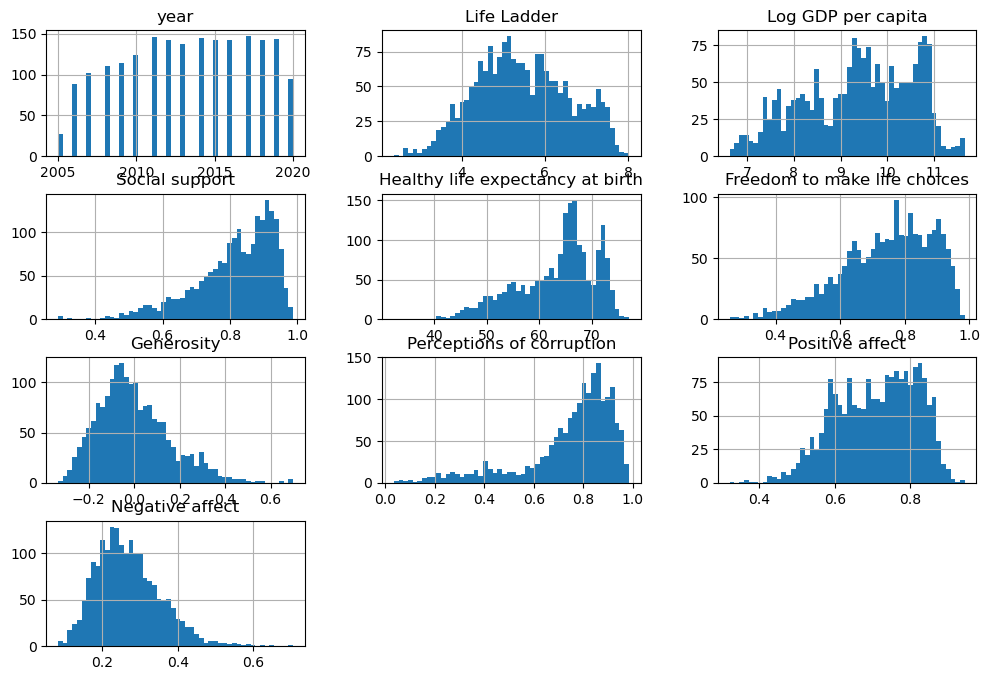

In [10]:
# Displaying the histogram for each attributes

happiness_df.hist(bins=50, figsize=(12, 8))
plt.show()

In [11]:
# Checking for null values

print(happiness_df["year"].isnull().values.any())
print(happiness_df["Life Ladder"].isnull().values.any())
print(happiness_df["Log GDP per capita"].isnull().values.any())
print(happiness_df["Social support"].isnull().values.any())
print(happiness_df["Healthy life expectancy at birth"].isnull().values.any())
print(happiness_df["Freedom to make life choices"].isnull().values.any())
print(happiness_df["Generosity"].isnull().values.any())
print(happiness_df["Perceptions of corruption"].isnull().values.any())
print(happiness_df["Positive affect"].isnull().values.any())
print(happiness_df["Negative affect"].isnull().values.any())

False
False
True
True
True
True
True
True
True
True


#### Answer:- If we closely analyze the histograms and skewness values, these are the inferences:-
#### Log GDP per Capita: Its skewness value is -0.3, hence we can say the values are symmetrically distributed. The histogram confirms that.
#### Social support: The histogram is left skewed with a staggered bell shaped curve.
#### Healthy life expectancy at birth: The histogram is slightly left skewed since it has a skewness value of -0.7.
#### Freedom to make life choices: The histogram is slightly left skewed, but overall it can be considered symmetrically distributed.
#### Generosity: The histogram is right skewed with a staggered bell shaped curve.
#### Perceptions of corruption: The histogram is highly left skewed.
#### Positive affect: The values are symmetrically distributed.
#### Negative affect: The histogram is slightly right skewed.

#### All attributes except year and Life Ladder have null values in them. These attributes need special treatment and the null values need to be tackled. They can be either imputed or dropped. We will drop them.  

### Part 3

#### Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [12]:
# Finding the Pearson Correlation Coefficient (PCC) between the attributes

happiness_df.drop(columns=['Country name','year']).corr(method ='pearson')

Life Ladder  Log GDP per capita  \
Life Ladder                          1.000000            0.790166   
Log GDP per capita                   0.790166            1.000000   
Social support                       0.707806            0.692602   
Healthy life expectancy at birth     0.744506            0.848049   
Freedom to make life choices         0.528063            0.367932   
Generosity                           0.190632           -0.000915   
Perceptions of corruption           -0.427245           -0.345511   
Positive affect                      0.532273            0.302282   
Negative affect                     -0.297488           -0.210781   

                                  Social support  \
Life Ladder                             0.707806   
Log GDP per capita                      0.692602   
Social support                          1.000000   
Healthy life expectancy at birth        0.616037   
Freedom to make life choices            0.410402   
Generosity                              0.067000   
Perceptions of corruption              -0.219040   
Positive affect                         0.432152   
Negative affect                        -0.395865   

                                  Healthy life expectancy at birth  \
Life Ladder                                               0.744506   
Log GDP per capita                                        0.848049   
Social support                                            0.616037   
Healthy life expectancy at birth                          1.000000   
Freedom to make life choices                              0.388681   
Generosity                                                0.020737   
Perceptions of corruption                                -0.322461   
Positive affect                                           0.318247   
Negative affect                                          -0.139477   

                                  Freedom to make life choices  Generosity  \
Life Ladder                                           0.528063    0.190632   
Log GDP per capita                                    0.367932   -0.000915   
Social support                                        0.410402    0.067000   
Healthy life expectancy at birth                      0.388681    0.020737   
Freedom to make life choices                          1.000000    0.329300   
Generosity                                            0.329300    1.000000   
Perceptions of corruption                            -0.487883   -0.290706   
Positive affect                                       0.606114    0.358006   
Negative affect                                      -0.267661   -0.092542   

                                  Perceptions of corruption  Positive affect  \
Life Ladder                                       -0.427245         0.532273   
Log GDP per capita                                -0.345511         0.302282   
Social support                                    -0.219040         0.432152   
Healthy life expectancy at birth                  -0.322461         0.318247   
Freedom to make life choices                      -0.487883         0.606114   
Generosity                                        -0.290706         0.358006   
Perceptions of corruption                          1.000000        -0.296517   
Positive affect                                   -0.296517         1.000000   
Negative affect                                    0.264225        -0.374439   

                                  Negative affect  
Life Ladder                             -0.297488  
Log GDP per capita                      -0.210781  
Social support                          -0.395865  
Healthy life expectancy at birth        -0.139477  
Freedom to make life choices            -0.267661  
Generosity                              -0.092542  
Perceptions of corruption                0.264225  
Positive affect                         -0.374439  
Negative affect                          1.000000

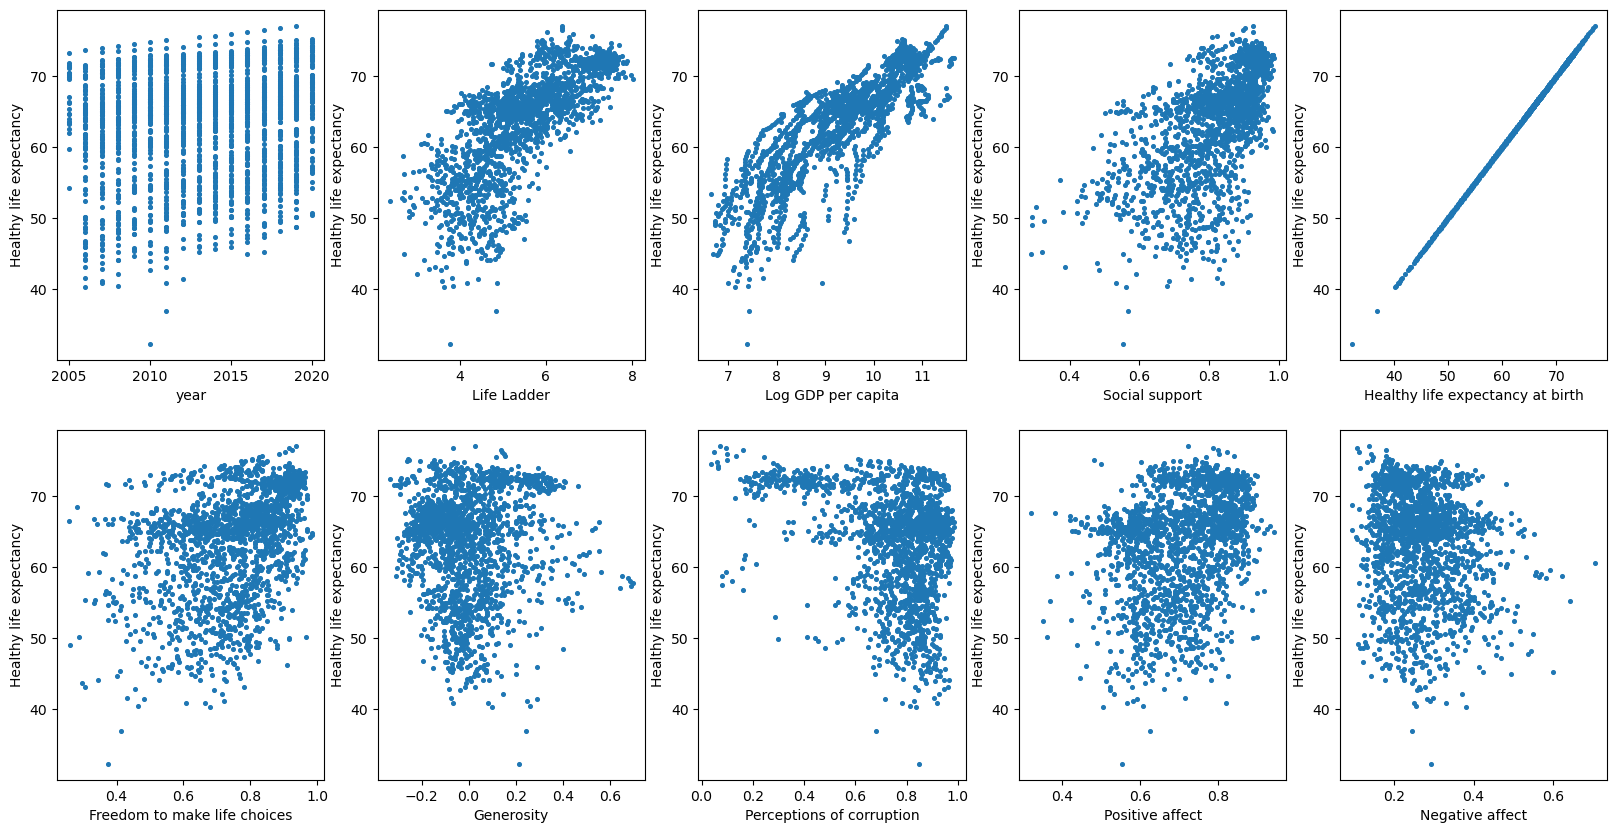

In [13]:
# Scatter plots of attributes versus output label

col = ['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
 'Generosity','Perceptions of corruption','Positive affect','Negative affect']

fig, ax = plt.subplots(2,int(len(col)/2 ), figsize=(20,10))
j = 0
k = 0
for i in range(len(col )):
    if(i == (len(col )/2)):
        j = 0
        k = 1
    # scatter plot
    ax[k,j].scatter(x=happiness_df[col [i]],y=happiness_df['Healthy life expectancy at birth'], s=7)
    ax[k,j].set_xlabel(col [i])
    ax[k,j].set_ylabel('Healthy life expectancy')
    j = j + 1

#### Answer:- From the correlation chart, we can say that attributes such as Life ladder, Log GDP per capita, Social support, Freedom to make life choices, Generosity and Positive affect have a positive correlation with the output label Healthy life expectancy at birth. Attributes like Perceptions of corruption, Negative affect have a negative correlation with the output label. Furthermore we can dissect Life ladder, Log GDP per capita, Social support have a high positive correlation and Freedom to make life choices, Generosity and Positive affect have low positive correlation.

### Part 4

#### Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [14]:
# Removing unwanted columns and NULL values

happiness_df_trimmed = happiness_df.drop(columns=['Country name','year', 'Life Ladder'])
happiness_df_trimmed = happiness_df_trimmed.dropna()
happiness_df_trimmed.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0               7.370           0.451                             50.80   
1               7.540           0.552                             51.20   
2               7.647           0.539                             51.60   
3               7.620           0.521                             51.92   
4               7.705           0.521                             52.24   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.718       0.168                      0.882   
1                         0.679       0.190                      0.850   
2                         0.600       0.121                      0.707   
3                         0.496       0.162                      0.731   
4                         0.531       0.236                      0.776   

   Positive affect  Negative affect  
0            0.518            0.258  
1            0.584            0.237  
2            0.618            0.275  
3            0.611            0.267  
4            0.710            0.268

In [15]:
# Converting 'Log GDP per capita' to a categorical type attribute 'GDP_Cat'

happiness_df_trimmed['GDP_Cat'] = pd.cut(happiness_df_trimmed['Log GDP per capita'], bins=[6.0, 8.0, 10.0, np.inf], labels=[1, 2, 3])

In [16]:
# Splitting the data intro training and testing using randomized method and stratified method

x = happiness_df_trimmed.drop('Healthy life expectancy at birth', axis=1)
y = happiness_df_trimmed['Healthy life expectancy at birth']

# We are using the newly created 'GDP_Cat' as our stratified sampling bins
y_strat_bin = happiness_df_trimmed['GDP_Cat']

# Randomized 
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.20, random_state=24)

# Stratified
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.20, stratify = y_strat_bin)

print(x_train_1.shape,y_train_1.shape, x_test_1.shape, y_test_1.shape)

(1366, 8) (1366,) (342, 8) (342,)


In [17]:
# Distribution ratio of 'GDP_Cat' in the overall dataset
dist_overall = happiness_df_trimmed["GDP_Cat"].value_counts() / len(happiness_df_trimmed)

# Distribution ratio of 'GDP_Cat' in the randomized test dataset
dist_randomized = x_test_1["GDP_Cat"].value_counts() / len(x_test_1)

# Distribution ratio of 'GDP_Cat' in the stratified test dataset
dist_stratified = x_test_2["GDP_Cat"].value_counts() / len(x_test_2)

compare = pd.DataFrame({"Overall":dist_overall,"Randomized":dist_randomized,"Stratified":dist_stratified}).sort_index()
compare

Overall  Randomized  Stratified
1  0.170960    0.143275    0.172515
2  0.497658    0.505848    0.497076
3  0.331382    0.350877    0.330409

#### Answer:- Before train test split, we dropped the unwanted columns and also tackled the NULL values in the dataset. Then we created our test dataset using 2 methods: randomized and stratified. For randomized, we simply used the test_train_split function. For stratified, we first create a categorical attribute which can be used as stratas. We choose 'Log GDP per capita' attribute since it has the highest Pearson Correlation Coefficient with our target variable. We divide the 'Log GDP per capita' column into 3 labels 1,2,3 based on ranges. Then we compare the label distributions of the overall dataset, randomized test dataset and stratified test dataset. We see that stratified method produces better results than randomized methods. It produces a test set which is representative of the entire dataset.

### Part 5 FIX!

## Added learning rates to SGD and plotted the loss vs epochs graphs

#### Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. Display the training and validation loss as a function of training iterations.

In [18]:
# Converting training and test sets into numpy arrays

x_train_2, x_test_2, y_train_2, y_test_2 = np.array(x_train_2), np.array(x_test_2), np.array(y_train_2), np.array(y_test_2)

In [19]:
# Linear regression model using a closed-form solution (Normal equation) with four-fold cross-validation 
# We are using RMSE evaluation metric. 

def normal(x,y):
    phi = np.hstack([x, np.ones((x.shape[0],1))])
    phi_t_phi = np.matmul(phi.T, phi)
    reg = 1*np.eye(phi_t_phi.shape[0])
    inv_term = np.linalg.inv(reg+phi_t_phi)
    w = np.matmul(inv_term,np.matmul(phi.T,y))
    return w

def mse(y_pred,y_true):
    return np.sum((y_true.reshape((y_true.shape[0],))-y_pred.reshape((y_true.shape[0],)))**2,axis=0)/y_pred.shape[0]

0
Train error: 3.818776080593649
Validation error: 3.8945433333753683
1
Train error: 3.8870500147623175
Validation error: 3.707428285591268
2
Train error: 3.7859531773863266
Validation error: 4.001585070020308
3
Train error: 3.8472813016461296
Validation error: 3.8224446443526774


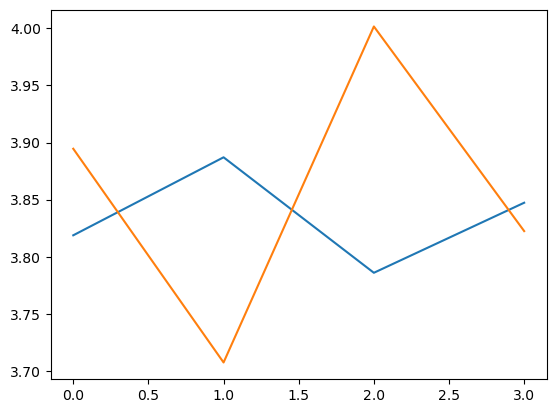

In [20]:
kf = KFold(n_splits = 4)

train_plot = []
val_plot = []

for cnt,var in enumerate(kf.split(x_train_2,y_train_2)) :
    print(cnt)
    x = x_train_2[var[0],:]
    y = y_train_2[var[0]]
    x_val = x_train_2[var[1],:]
    y_val = y_train_2[var[1]]
    w = normal(x,y)
    phi = np.hstack([x, np.ones((x.shape[0],1))])
    y_pred_train = np.matmul(phi,w.reshape(9,1))
    phi_val = np.hstack([x_val, np.ones((x_val.shape[0],1))])
    y_pred_val = np.matmul(phi_val,w.reshape(9,1),)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))

plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
test_stack = np.hstack([x_test_2, np.ones((x_test_2.shape[0],1))])
y_pred_test = np.matmul(test_stack,w.reshape(9,1),)
metric_dict = {}
metric_dict['Linear regression'] = np.sqrt(mse(y_pred_test,y_test_2))

RMSE score between y_pred_val and y_test for learning_rate=1e-06: 3.96966749079844
RMSE score between y_pred_val and y_test for learning_rate=1e-05: 3.7670963034078917
RMSE score between y_pred_val and y_test for learning_rate=0.0001: 3.689297182286318
RMSE score between y_pred_val and y_test for learning_rate=0.001: 3.9322983646063134
RMSE score between y_pred_val and y_test for learning_rate=0.01: 4.374503043689119


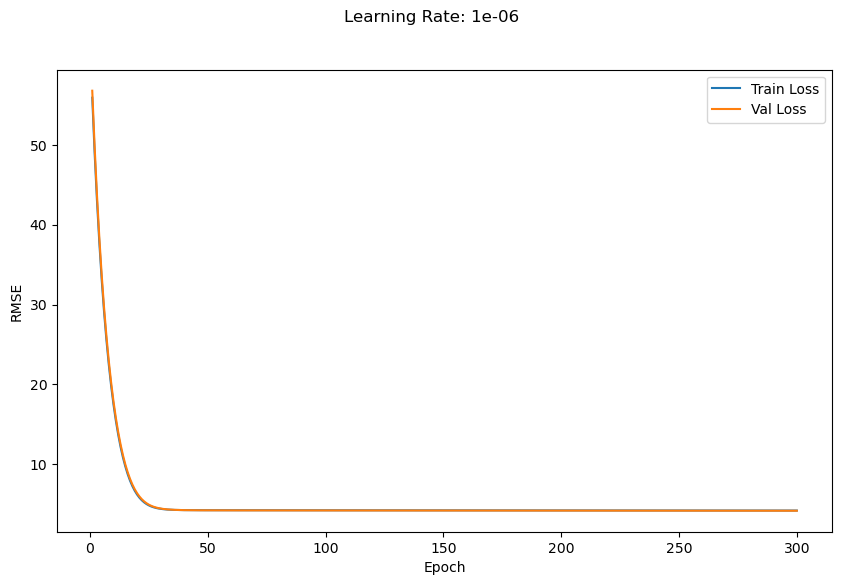

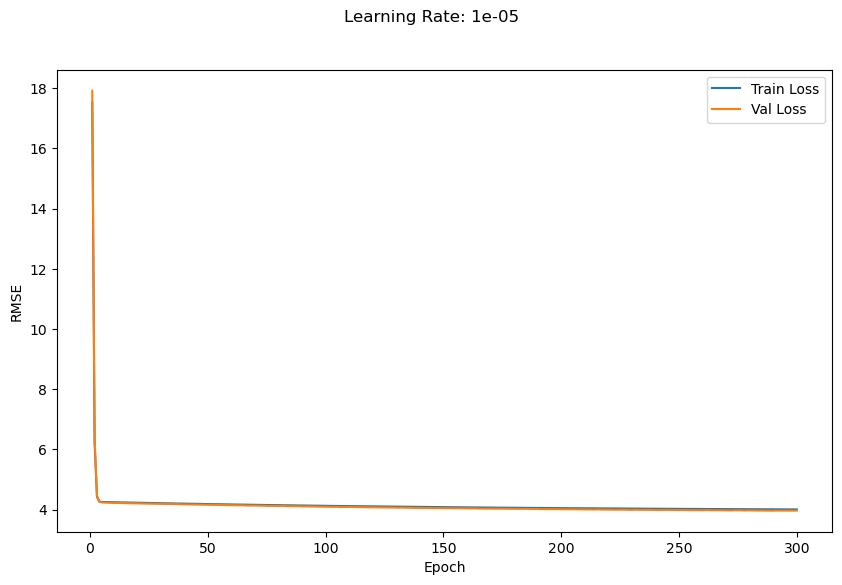

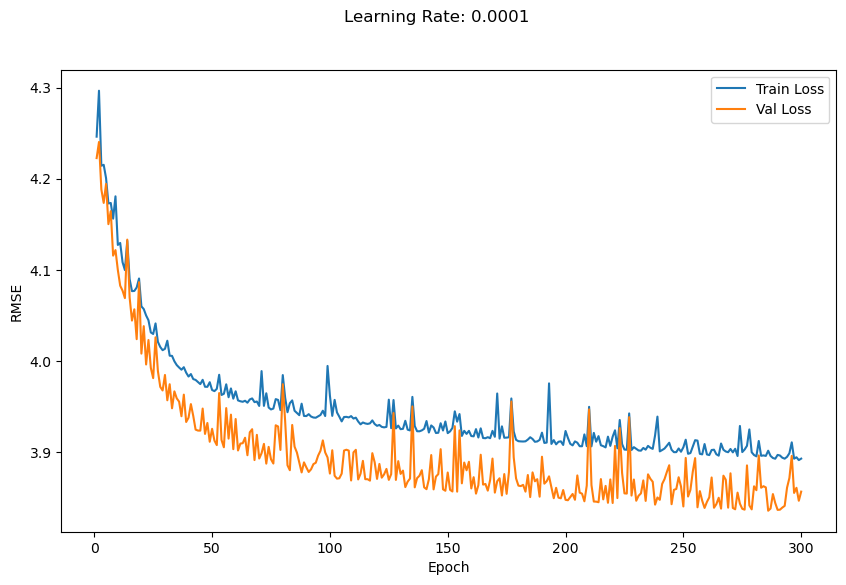

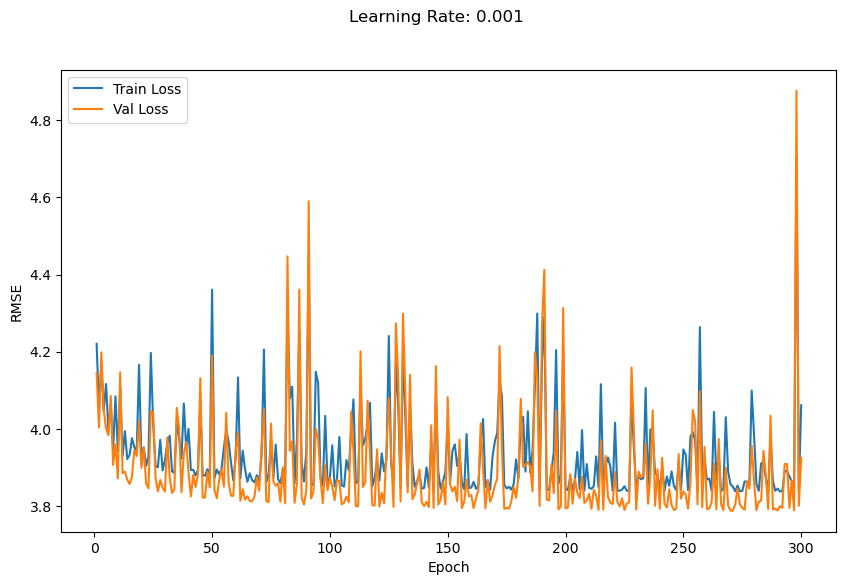

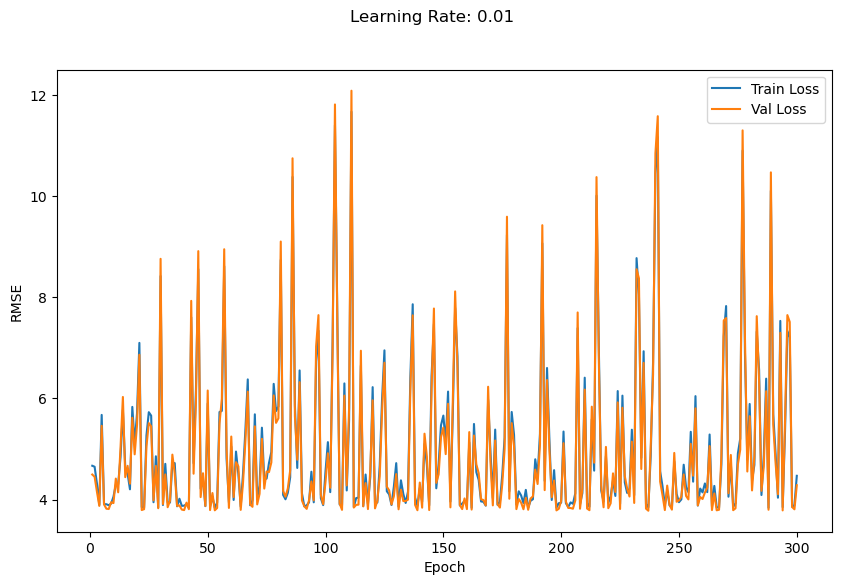

In [21]:
# SGD with different learning rate

learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300

train_losses = np.zeros((len(learning_rates), n_epochs))
val_losses = np.zeros((len(learning_rates), n_epochs))
test_rmse_scores = []

for i, learning_rate in enumerate(learning_rates):
    sgd = SGDRegressor(max_iter=1, warm_start=True, eta0=learning_rate, learning_rate='constant', tol=None, shuffle=True, random_state=None)
    for epoch in range(n_epochs):
        sgd.partial_fit(x_train_2, y_train_2)
        y_pred_train = sgd.predict(x_train_2)
        y_pred_val = sgd.predict(x_val)
        train_losses[i, epoch] = np.sqrt(mse(y_pred_train, y_train_2))
        val_losses[i, epoch] = np.sqrt(mse(y_pred_val, y_val))

    # Plot train and val losses for each epoch and each learning rate separately
    fig, axs = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Learning Rate: {learning_rate}")
    axs.plot(range(1, n_epochs + 1), train_losses[i], label="Train Loss")
    axs.plot(range(1, n_epochs + 1), val_losses[i], label="Val Loss")
    axs.set_xlabel("Epoch")
    axs.set_ylabel("RMSE")
    axs.legend()

    # Calculate RMSE score on test set
    y_pred_test = sgd.predict(x_test_2)
    test_rmse_score = np.sqrt(mse(y_pred_test, y_test_2))
    metric_dict['SGD with learning rate ='+str(learning_rate)] = test_rmse_score
    print(f"RMSE score between y_pred_val and y_test for learning_rate={learning_rate}: {test_rmse_score}")
    test_rmse_scores.append(test_rmse_score)

plt.show()


RMSE score between y_pred_val and y_test for learning_rate=1e-06 and penalty_factor=None: 3.9696651820128945
RMSE score between y_pred_val and y_test for learning_rate=1e-05 and penalty_factor=None: 3.767312827919267
RMSE score between y_pred_val and y_test for learning_rate=0.0001 and penalty_factor=None: 3.699389148877477
RMSE score between y_pred_val and y_test for learning_rate=0.001 and penalty_factor=None: 3.7830674990488733
RMSE score between y_pred_val and y_test for learning_rate=0.01 and penalty_factor=None: 3.836960346031612
RMSE score between y_pred_val and y_test for learning_rate=1e-06 and penalty_factor=l1: 3.9696603920934166
RMSE score between y_pred_val and y_test for learning_rate=1e-05 and penalty_factor=l1: 3.768378646001259
RMSE score between y_pred_val and y_test for learning_rate=0.0001 and penalty_factor=l1: 3.7035761649960635
RMSE score between y_pred_val and y_test for learning_rate=0.001 and penalty_factor=l1: 3.7274527732688942
RMSE score between y_pred_val 

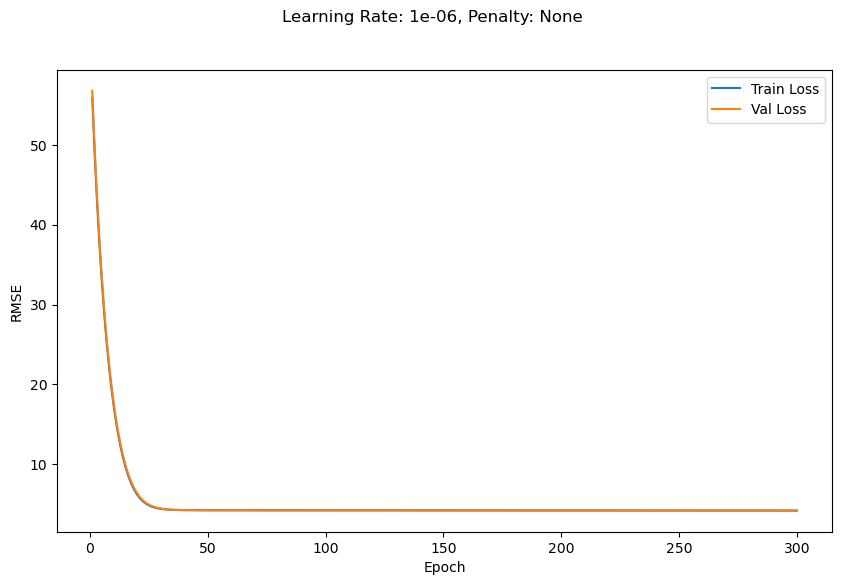

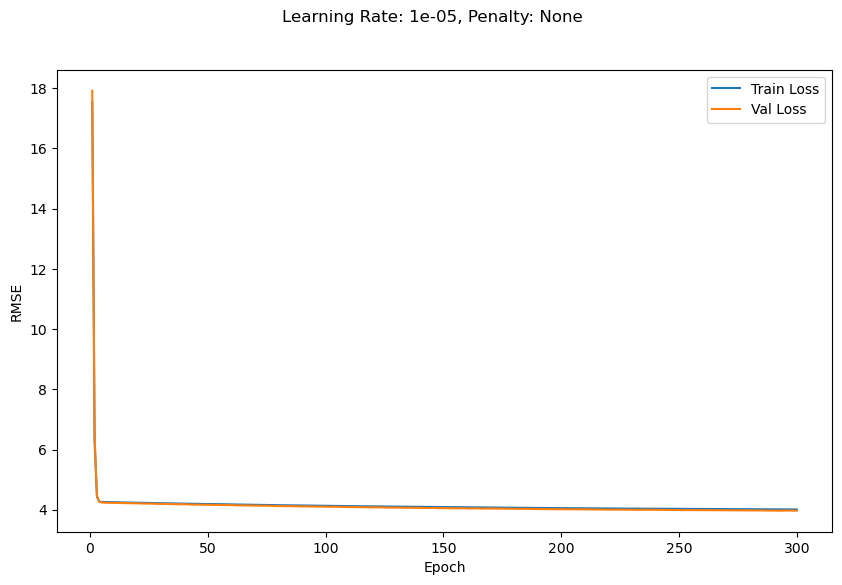

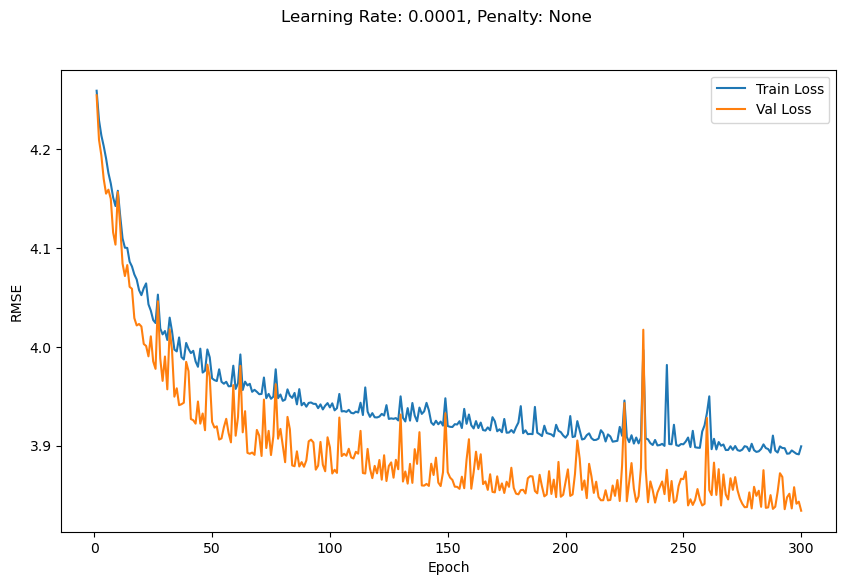

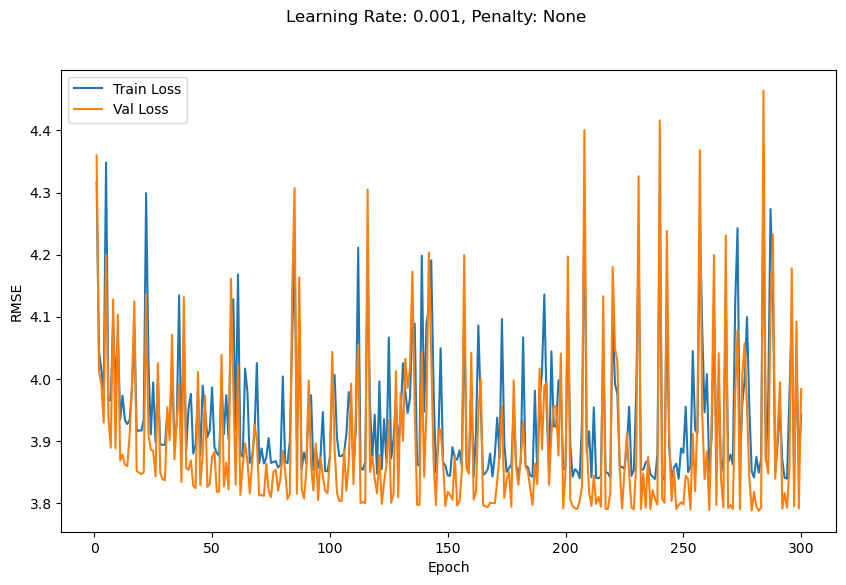

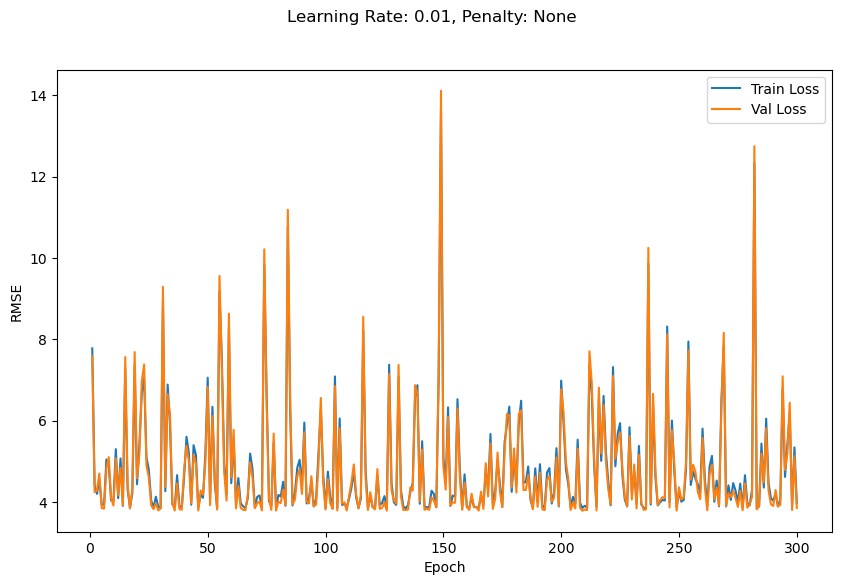

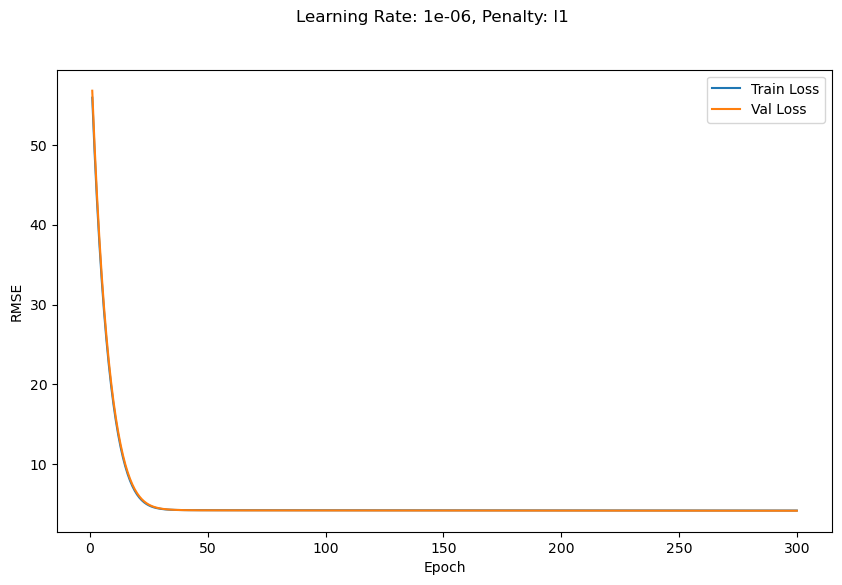

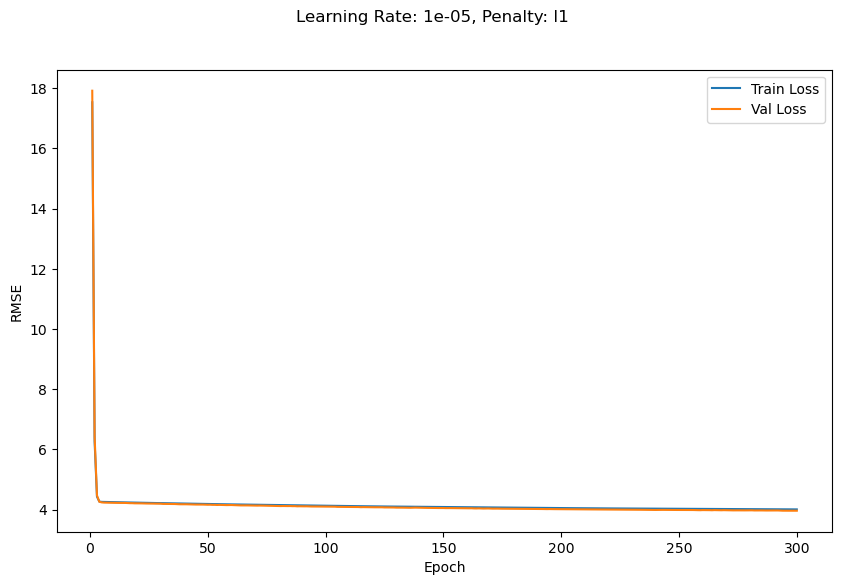

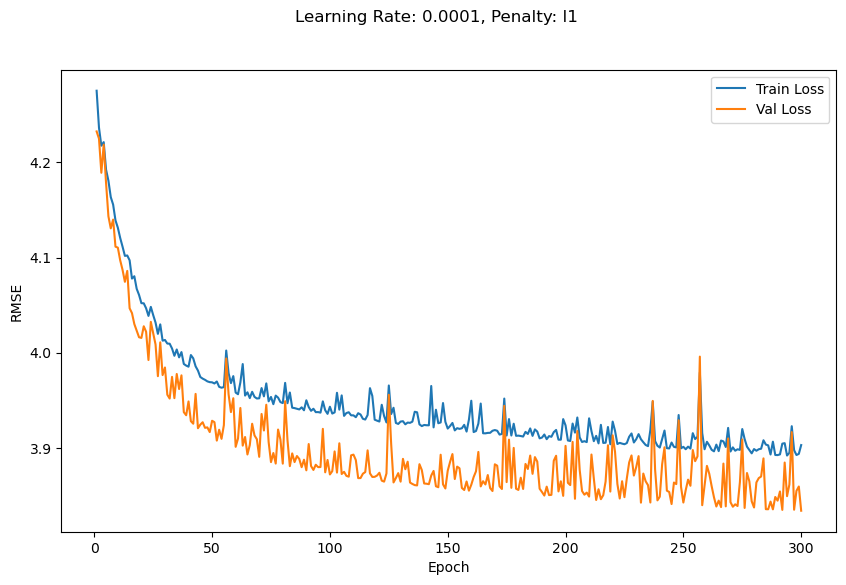

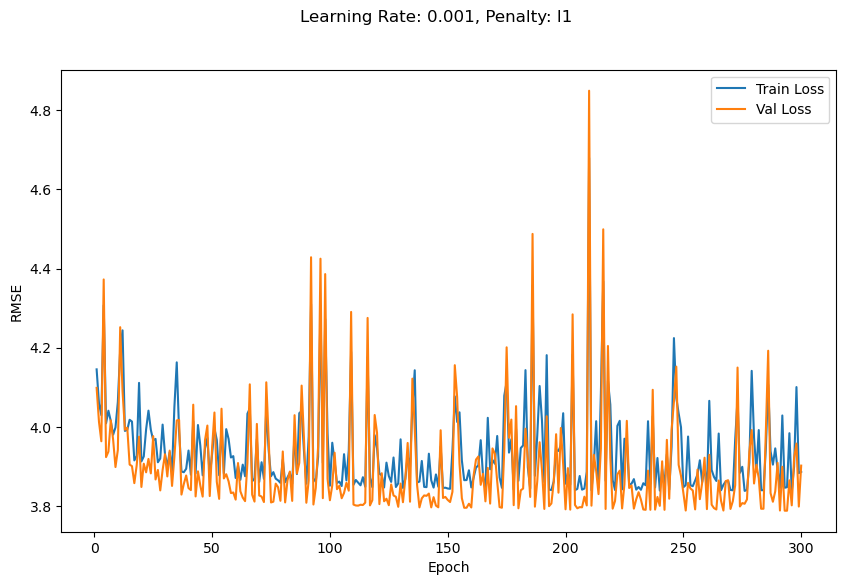

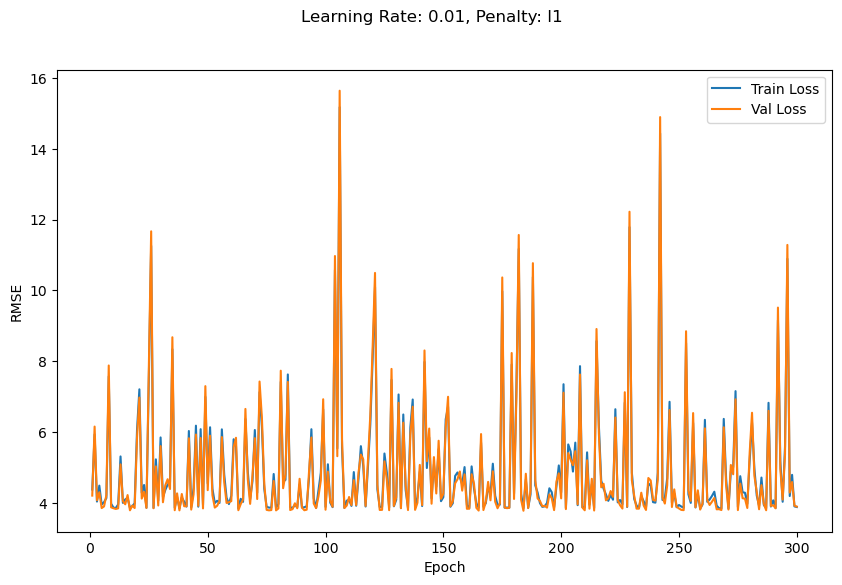

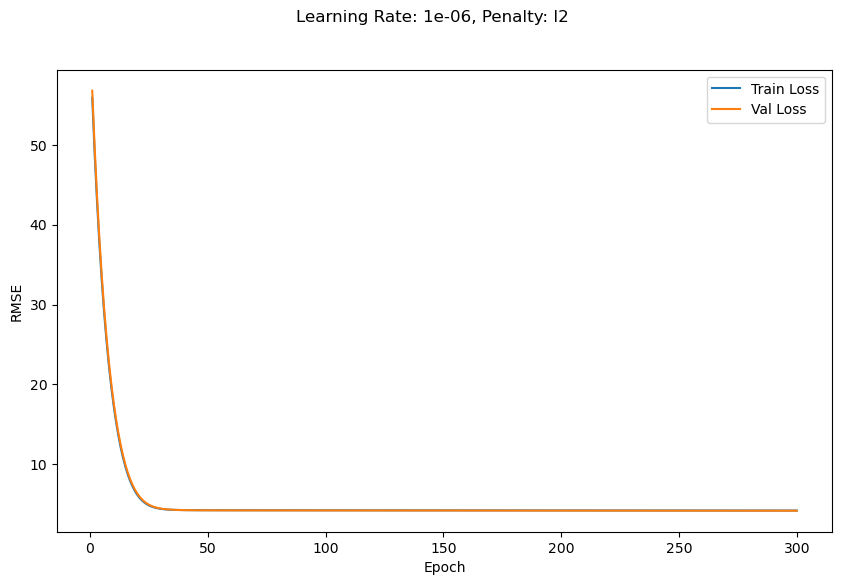

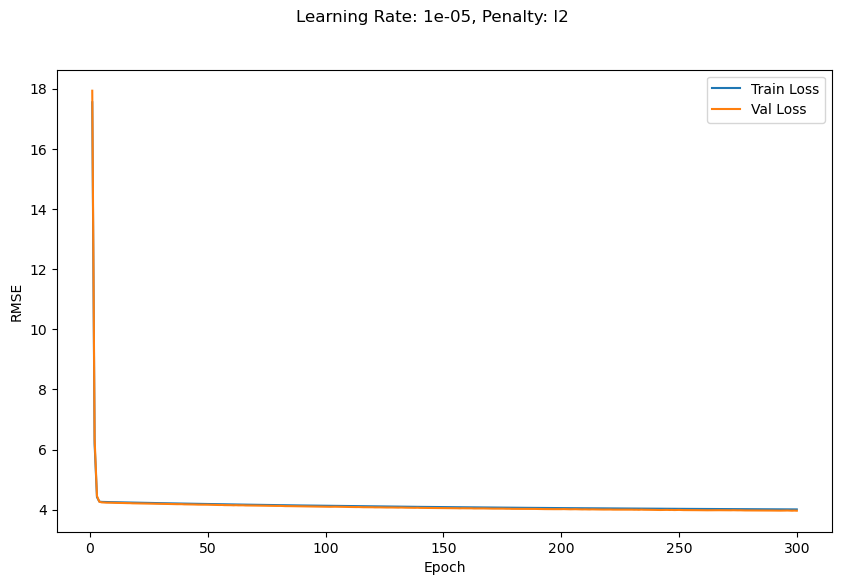

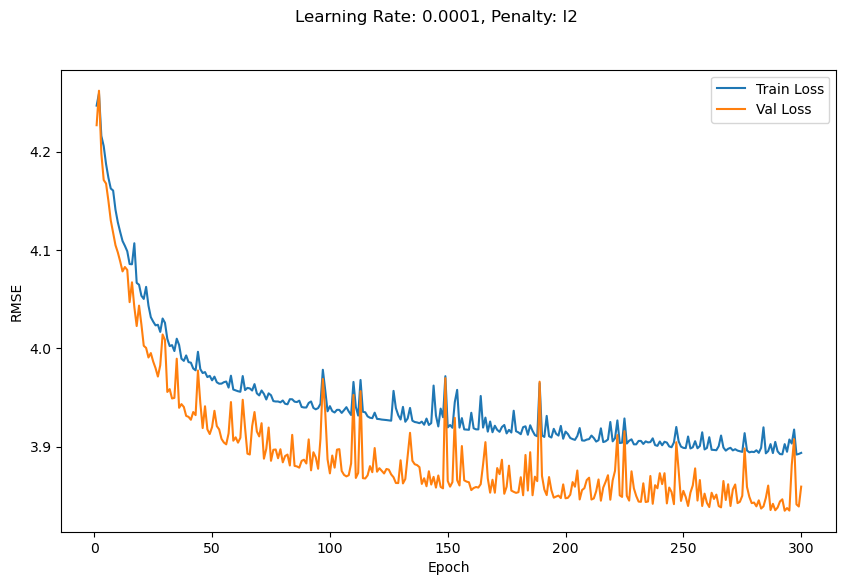

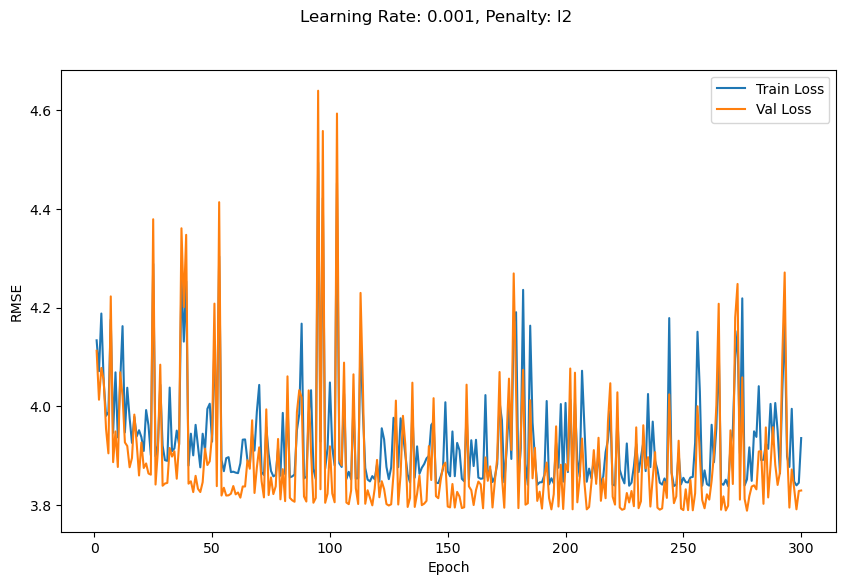

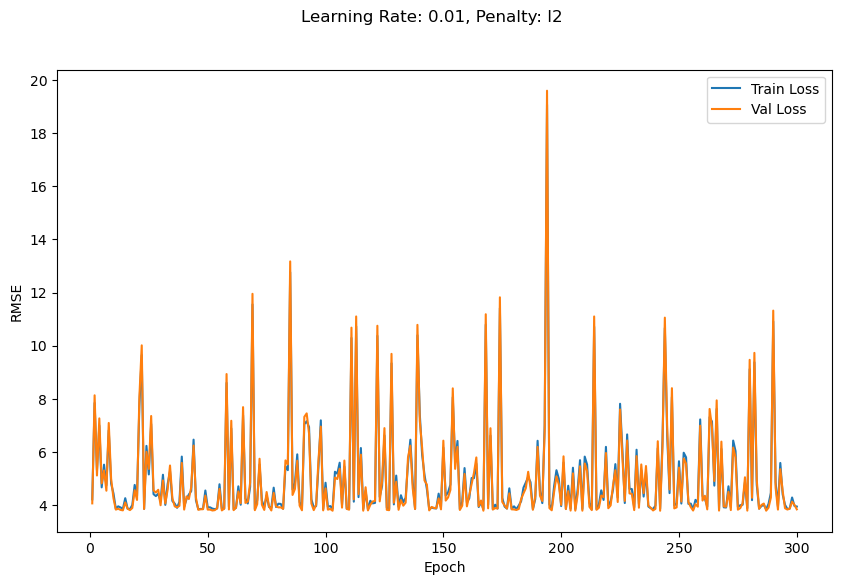

In [22]:
# SGD with different penalty terms

penalty_factors = [None, 'l1', 'l2']
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300

for penalty in penalty_factors:
    for i, learning_rate in enumerate(learning_rates):
        sgd = SGDRegressor(max_iter=1, warm_start=True, eta0=learning_rate, learning_rate='constant', tol=None, shuffle=True, random_state=None, penalty=penalty)
        train_losses = np.zeros(n_epochs)
        val_losses = np.zeros(n_epochs)
        for epoch in range(n_epochs):
            sgd.partial_fit(x_train_2, y_train_2)
            y_pred_train = sgd.predict(x_train_2)
            y_pred_val = sgd.predict(x_val)
            train_losses[epoch] = np.sqrt(mse(y_pred_train, y_train_2))
            val_losses[epoch] = np.sqrt(mse(y_pred_val, y_val))

        # Plot train and val losses for each epoch and each learning rate separately
        fig, axs = plt.subplots(figsize=(10, 6))
        fig.suptitle(f"Learning Rate: {learning_rate}, Penalty: {penalty}")
        axs.plot(range(1, n_epochs + 1), train_losses, label="Train Loss")
        axs.plot(range(1, n_epochs + 1), val_losses, label="Val Loss")
        axs.set_xlabel("Epoch")
        axs.set_ylabel("RMSE")
        axs.legend()
        
        # Calculate RMSE score on test set
        y_pred_test = sgd.predict(x_test_2)
        test_rmse_score = np.sqrt(mse(y_pred_test, y_test_2))
        metric_dict['SGD with learning rate ='+str(learning_rate)+' and penalty_factor =' + str(penalty)] = test_rmse_score
        print(f"RMSE score between y_pred_val and y_test for learning_rate={learning_rate} and penalty_factor={penalty}: {test_rmse_score}")
        test_rmse_scores.append(test_rmse_score)

plt.show()

0
Train error: 3.8186868297055447
Validation error: 3.874078616824582
1
Train error: 3.88731131963597
Validation error: 3.6444479315091987
2
Train error: 3.7862233026159204
Validation error: 3.9711948361115503
3
Train error: 3.8474595920132773
Validation error: 3.778825605436278


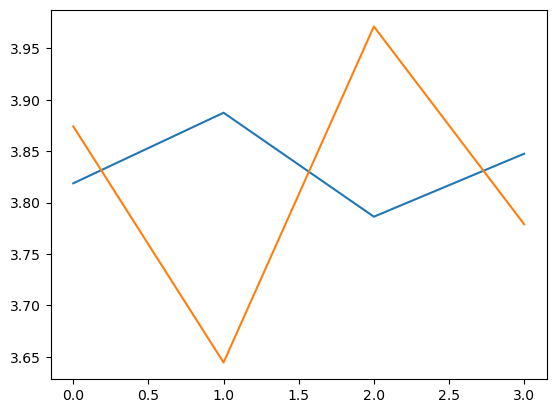

In [23]:
# Ridge

train_plot = []
val_plot = []
ridge = Ridge()
for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
    print(cnt)
    x = x_train_2[var[0],:]
    y = y_train_2[var[0]]
    x_val = x_train_2[var[1],:]
    y_val = y_train_2[var[1]]
    ridge.fit(x, y)
    y_pred_train = ridge.predict(x)
    ridge.fit(x_val, y_val)
    y_pred_val = ridge.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))

plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")

Alpha value: 0
0
Train error: 3.8164612972453944
Validation error: 3.865214725903877
1
Train error: 3.885364521098337
Validation error: 3.6333954981013745
2
Train error: 3.784381403215582
Validation error: 3.9598258620368276
3
Train error: 3.8455747398564712
Validation error: 3.766418213916159


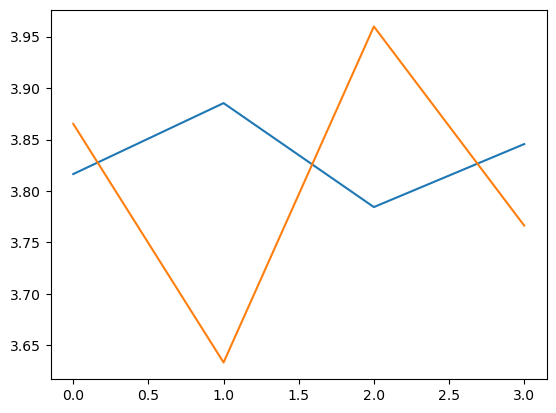



Alpha value: 0.001
0
Train error: 3.816461300573554
Validation error: 3.8652147455542765
1
Train error: 3.8853645239437653
Validation error: 3.6333955266443887
2
Train error: 3.7843814058771197
Validation error: 3.9598258914814157
3
Train error: 3.845574742575016
Validation error: 3.7664182493842664


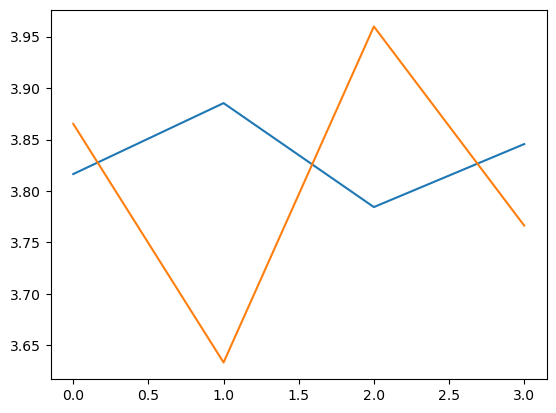



Alpha value: 1
0
Train error: 3.8186868297055447
Validation error: 3.874078616824582
1
Train error: 3.88731131963597
Validation error: 3.6444479315091987
2
Train error: 3.7862233026159204
Validation error: 3.9711948361115503
3
Train error: 3.8474595920132773
Validation error: 3.778825605436278


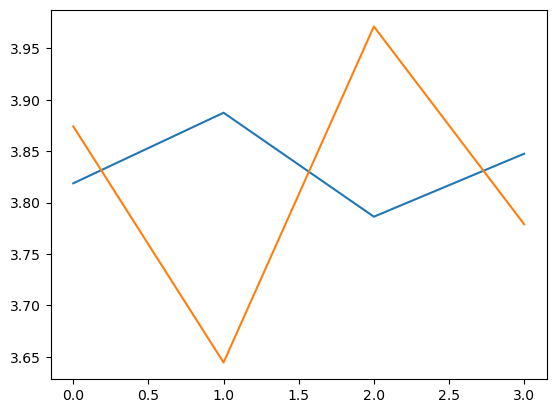



Alpha value: 10
0
Train error: 3.852839502605182
Validation error: 3.9452247522360193
1
Train error: 3.9199970199332586
Validation error: 3.7127295207848348
2
Train error: 3.8189913036504723
Validation error: 4.03460095127003
3
Train error: 3.880620352043506
Validation error: 3.8416972195632932


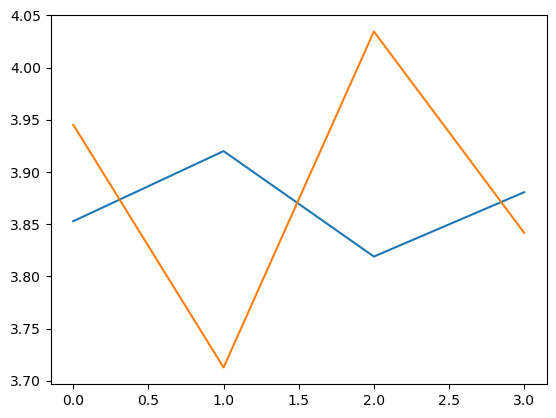



Alpha value: 100
0
Train error: 3.935456740365958
Validation error: 4.156639463680036
1
Train error: 4.011135347831783
Validation error: 3.888408358736641
2
Train error: 3.9118792669831643
Validation error: 4.210704490794341
3
Train error: 3.9723089888724608
Validation error: 4.013699803476162


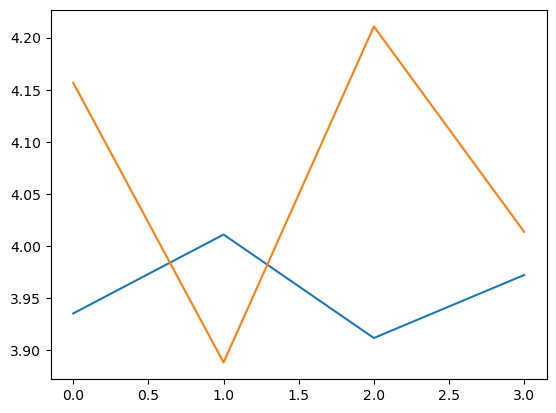

In [24]:
# Ridge with different learning rates

ridge_alpha = [0,0.001,1,10,100]

for r in ridge_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    ridge_obj = Ridge(alpha=r)
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        ridge_obj.fit(x, y)
        y_pred_train = ridge_obj.predict(x)
        ridge_obj.fit(x_val, y_val)
        y_pred_val = ridge_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = ridge_obj.predict(x_test_2)
        metric_dict['Ridge lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

0
Train error: 4.038797374934554
Validation error: 4.096396701079226
1
Train error: 4.093208809782641
Validation error: 3.926992058461979
2
Train error: 4.0112880311792205
Validation error: 4.1795496645221055
3
Train error: 4.073134414611913
Validation error: 3.98176966428072


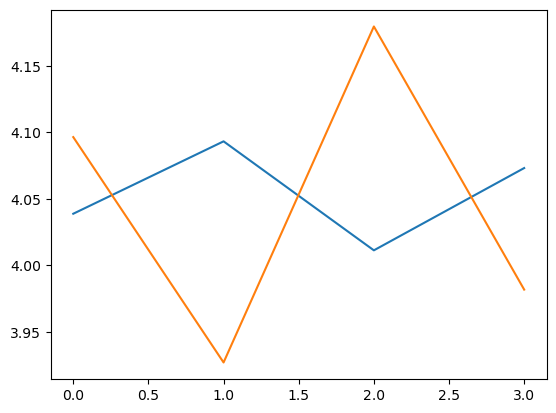

In [25]:
# Lasso

train_plot = []
val_plot = []
lasso = Lasso()
for cnt,var in enumerate(kf.split(x_train_2,y_train_2)) :
    print(cnt)
    x = x_train_2[var[0],:]
    y = y_train_2[var[0]]
    x_val = x_train_2[var[1],:]
    y_val = y_train_2[var[1]]
    lasso.fit(x, y)
    y_pred_train = lasso.predict(x)
    lasso.fit(x_val, y_val)
    y_pred_val = lasso.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))

plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")

Alpha value: 0
0
Train error: 3.8164612972453944
Validation error: 3.865214725903877
1
Train error: 3.885364521098337
Validation error: 3.6333954981013736
2
Train error: 3.7843814032155816
Validation error: 3.959825862036827
3
Train error: 3.8455747398564717
Validation error: 3.7664182139161584


C:\Users\jeets\AppData\Local\Temp\ipykernel_29384\3184651632.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_obj.fit(x, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.457e+03, tolerance: 5.971e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jee

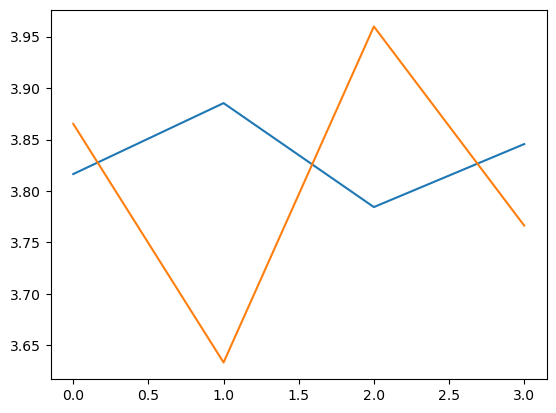



Alpha value: 0.001
0
Train error: 3.8165428504187138
Validation error: 3.8652885815082554
1
Train error: 3.8854637607861346
Validation error: 3.6334863391034093
2
Train error: 3.784485964434128
Validation error: 3.959932777446898
3
Train error: 3.845656624340425
Validation error: 3.7665211802799496


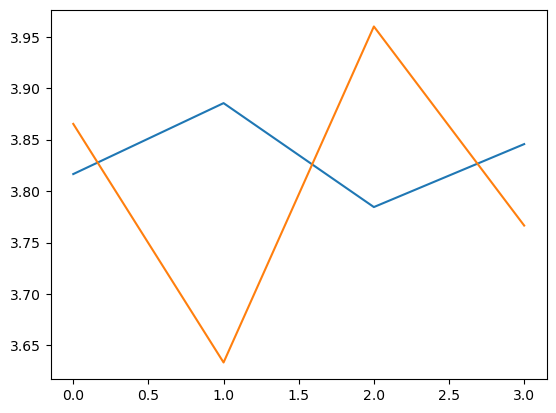



Alpha value: 1
0
Train error: 4.038797374934554
Validation error: 4.096396701079226
1
Train error: 4.093208809782641
Validation error: 3.926992058461979
2
Train error: 4.0112880311792205
Validation error: 4.1795496645221055
3
Train error: 4.073134414611913
Validation error: 3.98176966428072


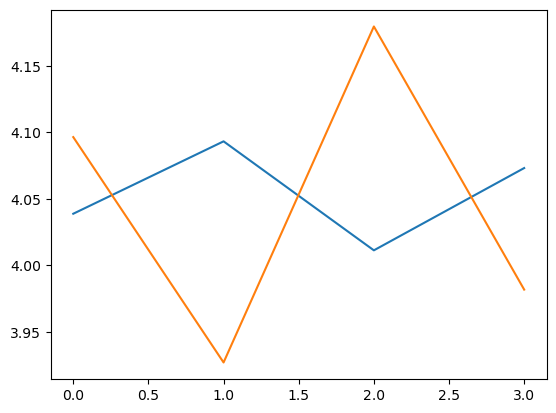



Alpha value: 10
0
Train error: 7.63616284494717
Validation error: 7.746478390300121
1
Train error: 7.768110993028431
Validation error: 7.393978527563255
2
Train error: 7.573816670038543
Validation error: 7.963619835739025
3
Train error: 7.717837191561589
Validation error: 7.468266103185494


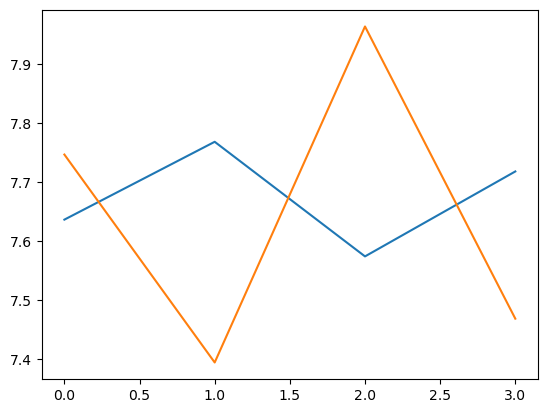



Alpha value: 100
0
Train error: 7.63616284494717
Validation error: 7.746478390300121
1
Train error: 7.768110993028431
Validation error: 7.393978527563255
2
Train error: 7.573816670038543
Validation error: 7.963619835739025
3
Train error: 7.717837191561589
Validation error: 7.468266103185494


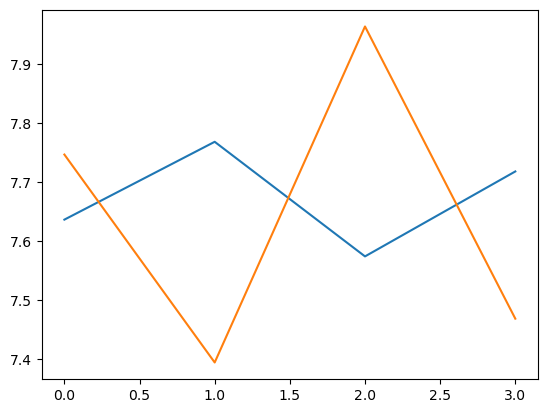

In [26]:
# Lasso with different learning rates

lasso_alpha = [0,0.001,1,10,100]

for r in lasso_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    lasso_obj = Lasso(alpha=r)
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        lasso_obj.fit(x, y)
        y_pred_train = lasso_obj.predict(x)
        lasso_obj.fit(x_val, y_val)
        y_pred_val = lasso_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = lasso_obj.predict(x_test_2)
        metric_dict['Lasso lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

0
Train error: 4.3702365712793885
Validation error: 4.4765321353181315
1
Train error: 4.453116189790851
Validation error: 4.216748083891603
2
Train error: 4.350523676313172
Validation error: 4.528462199812707
3
Train error: 4.413012157576303
Validation error: 4.327948718273263


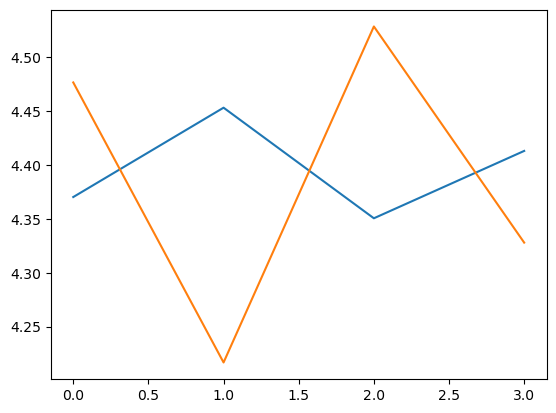

In [27]:
# Elastic Net

train_plot = []
val_plot = []
el_net = ElasticNet()
for cnt,var in enumerate(kf.split(x_train_2,y_train_2)) :
    print(cnt)
    x = x_train_2[var[0],:]
    y = y_train_2[var[0]]
    x_val = x_train_2[var[1],:]
    y_val = y_train_2[var[1]]
    el_net.fit(x, y)
    y_pred_train = el_net.predict(x)
    el_net.fit(x_val, y_val)
    y_pred_val = el_net.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))

plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")

Alpha value: 0
0
Train error: 3.8164612972453944
Validation error: 3.865214725903877
1
Train error: 3.885364521098337
Validation error: 3.6333954981013736
2
Train error: 3.7843814032155816
Validation error: 3.959825862036827
3
Train error: 3.8455747398564717
Validation error: 3.7664182139161584


C:\Users\jeets\AppData\Local\Temp\ipykernel_29384\9477209.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en_obj.fit(x, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.457e+03, tolerance: 5.971e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jeets\App

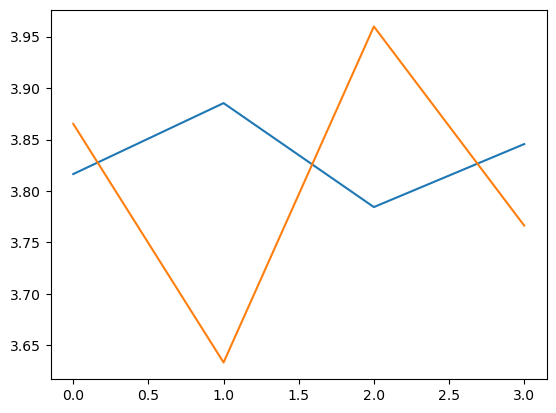



Alpha value: 0.001
0
Train error: 3.8173723278108436
Validation error: 3.865869484582345
1
Train error: 3.8861806530765493
Validation error: 3.6342771518819412
2
Train error: 3.785155090783941
Validation error: 3.96073348210214
3
Train error: 3.846346434889784
Validation error: 3.767491162795419


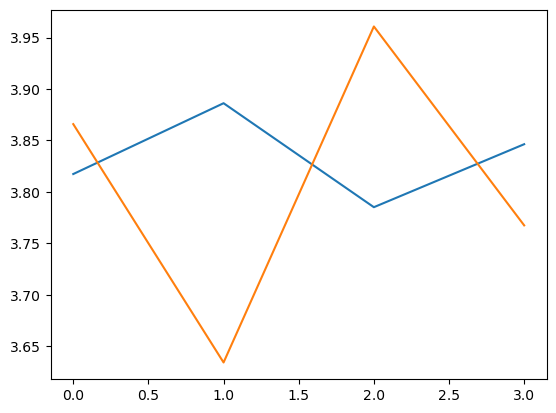



Alpha value: 1
0
Train error: 4.3702365712793885
Validation error: 4.4765321353181315
1
Train error: 4.453116189790851
Validation error: 4.216748083891603
2
Train error: 4.350523676313172
Validation error: 4.528462199812707
3
Train error: 4.413012157576303
Validation error: 4.327948718273263


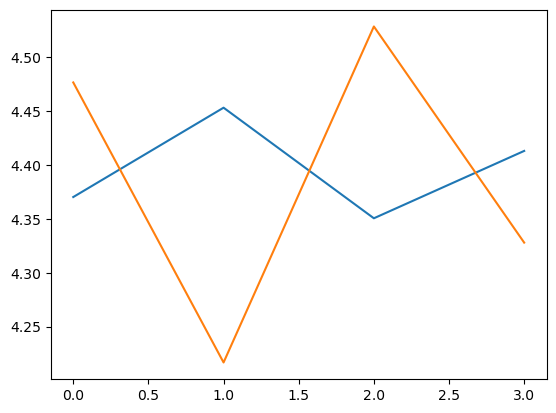



Alpha value: 10
0
Train error: 7.234094340632255
Validation error: 7.35235457830052
1
Train error: 7.348853346128042
Validation error: 7.0345224480322
2
Train error: 7.193514583679743
Validation error: 7.4902096613872375
3
Train error: 7.303280342238653
Validation error: 7.117028796466902


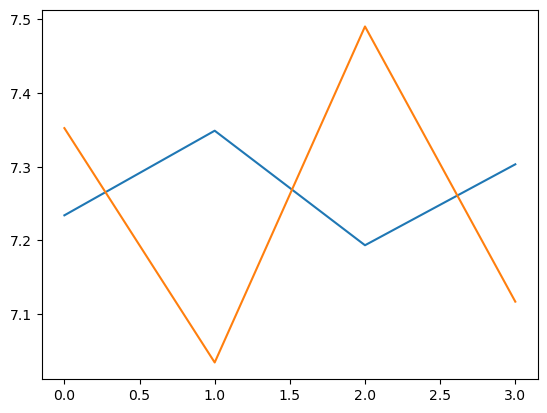



Alpha value: 100
0
Train error: 7.63616284494717
Validation error: 7.746478390300121
1
Train error: 7.768110993028431
Validation error: 7.393978527563255
2
Train error: 7.573816670038543
Validation error: 7.963619835739025
3
Train error: 7.717837191561589
Validation error: 7.468266103185494


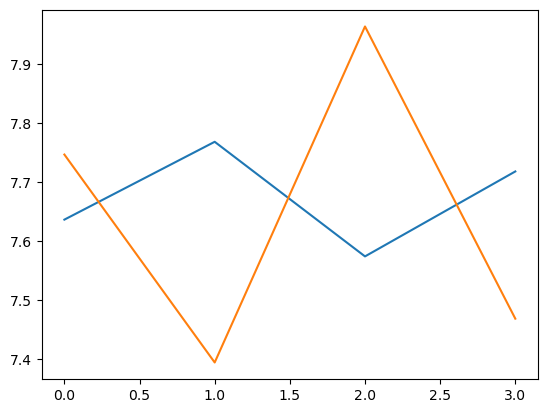

In [28]:
# ElasticNet with different learning rates

en_alpha = [0,0.001,1,10,100]

for r in en_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    en_obj = ElasticNet(alpha=r)
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        en_obj.fit(x, y)
        y_pred_train = en_obj.predict(x)
        en_obj.fit(x_val, y_val)
        y_pred_val = en_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = en_obj.predict(x_test_2)
        metric_dict['ElasticNet lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

#### Answer:- The above results show the performance of different linear regression models with different hyperparameters on the dataset. From the results, we can see that the choice of hyperparameters such as learning rate and penalty factor has a significant impact on the performance of the models.

#### For example, we can see that the Ridge regression model with a learning rate of 1 performs better than the same model with a learning rate of 0, 0.001, or 10. Similarly, we can see that the Lasso and ElasticNet models perform better with a learning rate of 0.001 than 0 or 1.

#### In the case of SGD, we can see that the performance of the model is influenced by the learning rate and penalty factor. Among the SGD models, we can see that the SGD model with a learning rate of 0.0001 and no penalty performs the best. If we want to trde-off accuracy for best-fit model, we can select the model with lowest learning rate.

#### Based on the above results, we can conclude that the SGD model with a learning rate of 0.0001 and no penalty factor is the best performing model among the linear regression models.

### Part 6 FIX!

## added ridge, lasso, etc  for polynomial regressor.

#### Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.

Degree: 2
0
Train error: 3.480439443923598
Validation error: 3.351374064617879
1
Train error: 3.5643830729882917
Validation error: 3.067284862232806
2
Train error: 3.4295680768999164
Validation error: 3.371557380615077
3
Train error: 3.470715748512232
Validation error: 3.3964585668919063


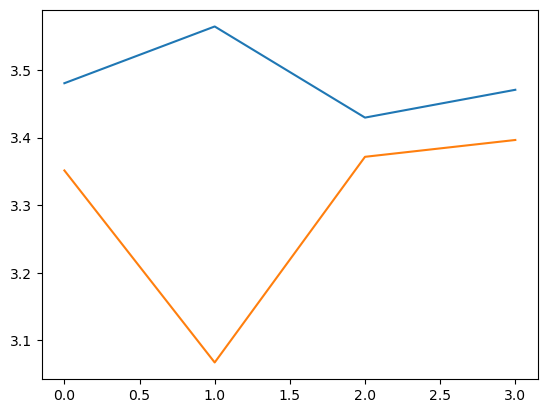



Degree: 5
0
Train error: 0.00018939667881141212
Validation error: 2.451125219907198e-09
1
Train error: 5.062712854654552e-06
Validation error: 7.071578381275772e-09
2
Train error: 1.5878902551751587e-05
Validation error: 1.5786709859717238e-09
3
Train error: 5.1821998857735465e-06
Validation error: 1.7168214995055538e-09


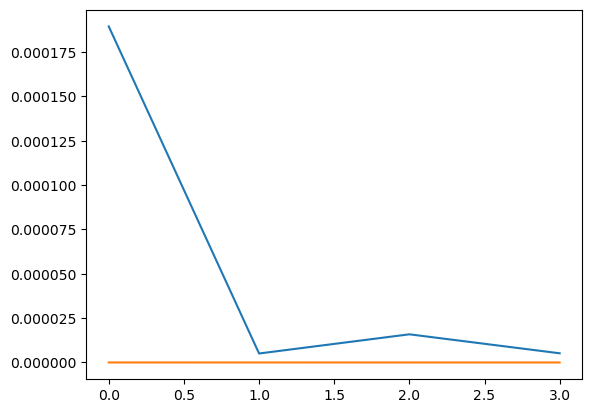



Degree: 10
0
Train error: 0.0003214144263393508
Validation error: 4.681995426008565e-09
1
Train error: 3.024337400238046e-05
Validation error: 2.6741039169683448e-09
2
Train error: 0.00010118785198348438
Validation error: 1.8587230792280205e-09
3
Train error: 4.328954718870466e-05
Validation error: 1.8945759387736444e-09


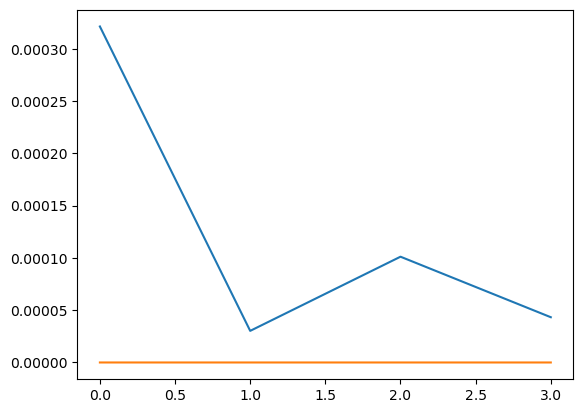

In [29]:
# Polynomial regression using various degrees

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    lin_reg = LinearRegression()    
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        lin_reg.fit(X_poly_1, y)
        y_pred_train=lin_reg.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        lin_reg.fit(X_poly_2, y_val)
        y_pred_val=lin_reg.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test_2)
        y_pred_test = lin_reg.predict(X_test_poly)
        metric_dict['Polynomial degree= '+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

Degree: 2
0
Train error: 3.6602909085079114
Validation error: 3.742760400310355
1
Train error: 3.737412793841303
Validation error: 3.5212350260206375
2
Train error: 3.6448151048627975
Validation error: 3.781549575381845
3
Train error: 3.6787414895501316
Validation error: 3.679502835184422


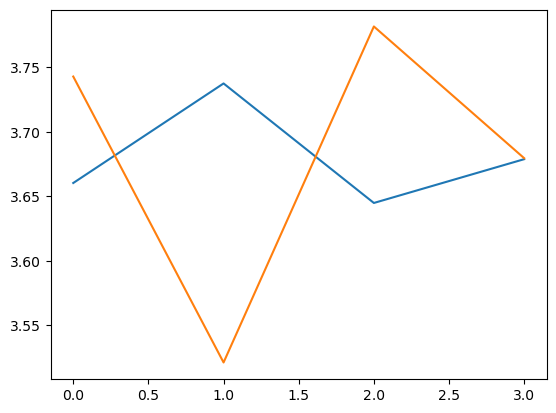



Degree: 5
0
Train error: 2.9179844038692258
Validation error: 2.554432896876155
1
Train error: 3.0015732246547286
Validation error: 2.349993268841313
2
Train error: 2.8936080554117076
Validation error: 2.5313295440635097
3
Train error: 2.887727509173558
Validation error: 2.6352916811729252


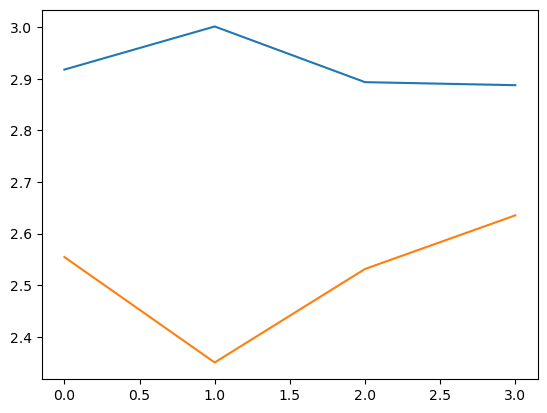



Degree: 10
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 2.8335826086736424
Validation error: 2.4871295827107733
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 2.9603305917893676
Validation error: 25.545416103975324
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 2.7915379552828097
Validation error: 9.852811014560062
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 2.7579822730904318
Validation error: 2.185656583260377


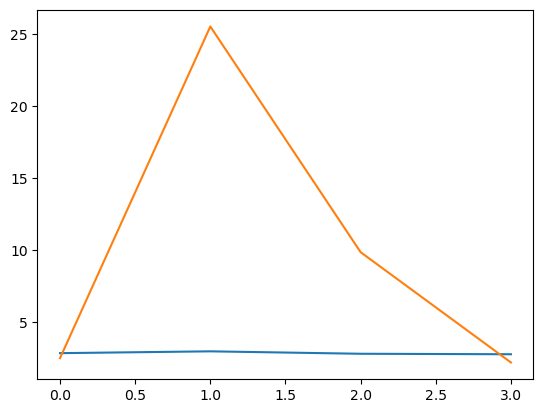

In [30]:
# Polynomial regression using ridge

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    ridge = Ridge()   
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        ridge.fit(X_poly_1, y)
        y_pred_train=ridge.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        ridge.fit(X_poly_2, y_val)
        y_pred_val=ridge.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test_2)
        y_pred_test = ridge.predict(X_test_poly)
        metric_dict['Polynomial degree for ridge= '+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

Degree: 2
0
Train error: 3.99869187802109
Validation error: 4.067223344251254
1
Train error: 4.064428555541588
Validation error: 3.8523874684629775
2
Train error: 3.9725429633156844
Validation error: 4.144051958874811
3
Train error: 4.031961214029916
Validation error: 3.9538730532276265


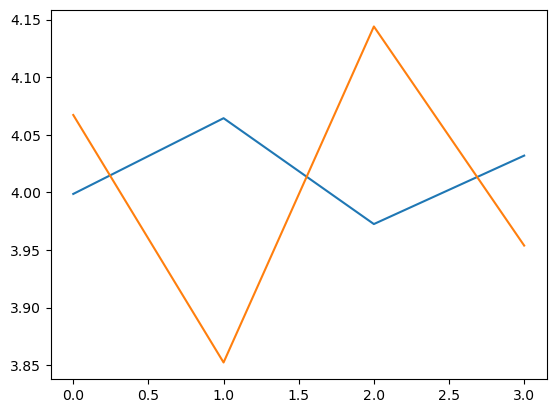



Degree: 5
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.806e+03, tolerance: 5.971e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+03, tolerance: 2.052e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.592533436869899
Validation error: 3.553567654493042
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.053e+03, tolerance: 6.179e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.6794849903060785
Validation error: 3.3245845983410924
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.706e+03, tolerance: 5.880e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.298e+03, tolerance: 2.163e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.5763128036350005
Validation error: 3.5731862311005425
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.756e+03, tolerance: 6.105e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.588692530944484
Validation error: 3.5918641573989802


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.274e+03, tolerance: 1.902e+00
  model = cd_fast.enet_coordinate_descent(


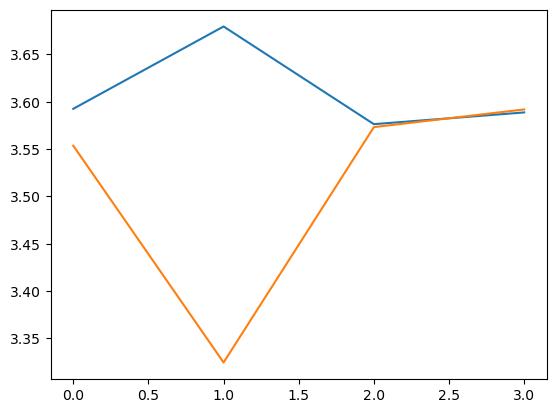



Degree: 10
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.282e+03, tolerance: 5.971e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+03, tolerance: 2.052e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.098252087785686
Validation error: 2.7967890257848333
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.611e+03, tolerance: 6.179e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.203328764270571
Validation error: 2.5856117987979634
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.273e+03, tolerance: 5.880e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+03, tolerance: 2.163e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.1018034940110537
Validation error: 2.743790973073377
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.233e+03, tolerance: 6.105e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+03, tolerance: 1.902e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.0903722088814733
Validation error: 2.8840436612412015


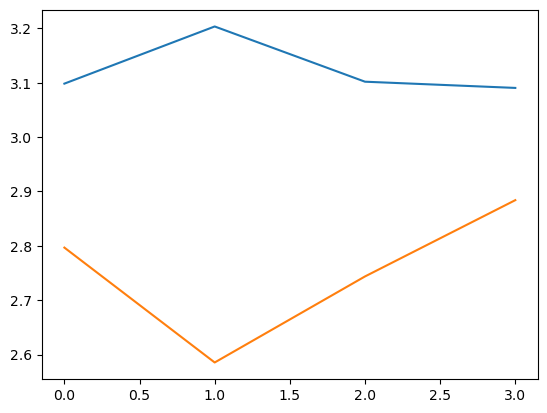

In [31]:
# Polynomial regression using lasso

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    lasso = Lasso()   
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        lasso.fit(X_poly_1, y)
        y_pred_train=lasso.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        lasso.fit(X_poly_2, y_val)
        y_pred_val=lasso.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test_2)
        y_pred_test = lasso.predict(X_test_poly)
        metric_dict['Polynomial degree for Lasso = '+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

Polynomial degree =: 2
Penalty: None
Learning Rate: 1e-06


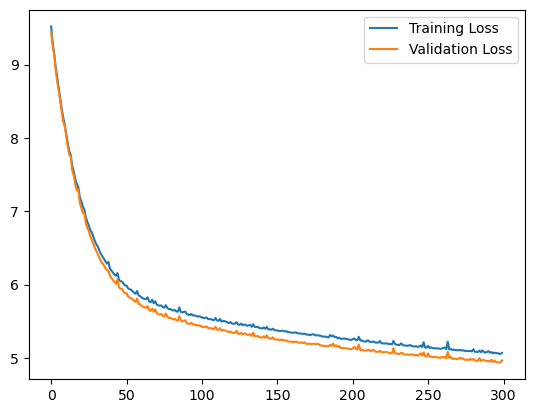

RMSE score on test data: 5.002836638073316
Polynomial degree =: 5
Penalty: None
Learning Rate: 1e-06


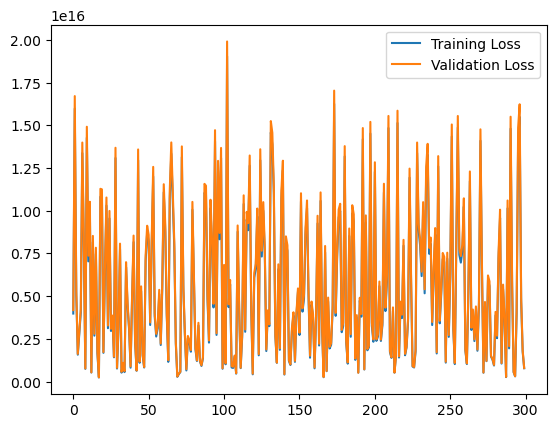

RMSE score on test data: 770328126591323.4
Polynomial degree =: 2
Penalty: None
Learning Rate: 1e-05


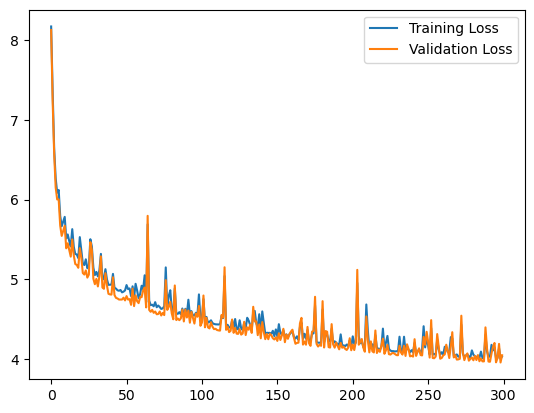

RMSE score on test data: 3.9412323193397887
Polynomial degree =: 5
Penalty: None
Learning Rate: 1e-05


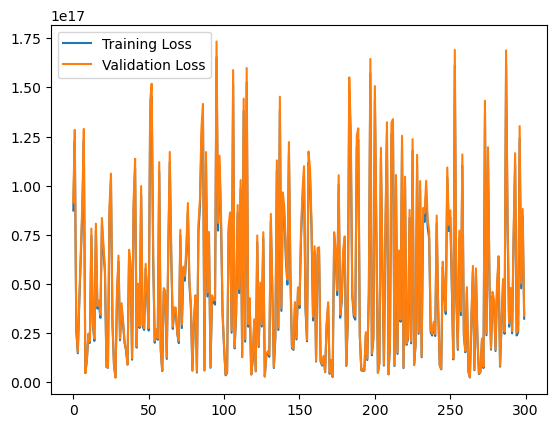

RMSE score on test data: 3.1996231306365056e+16
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.0001


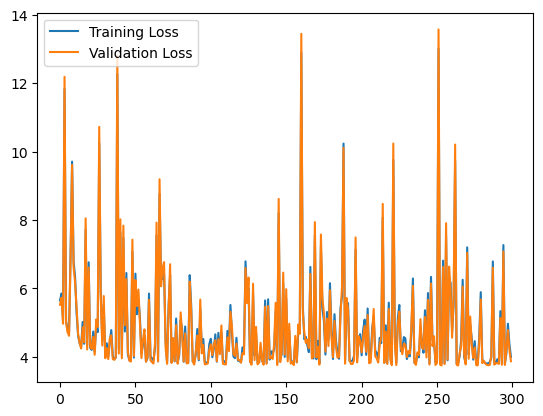

RMSE score on test data: 3.8693893503500916
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.0001


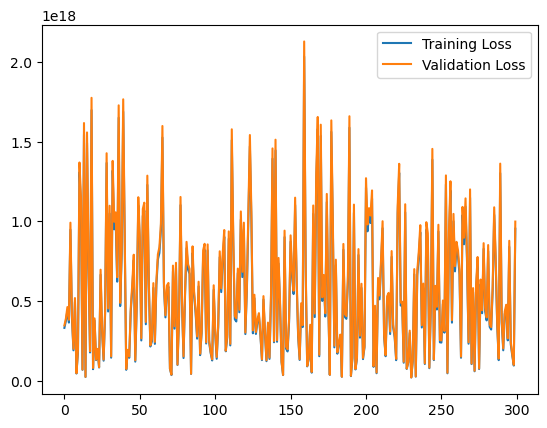

RMSE score on test data: 9.397934997545254e+17
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.001


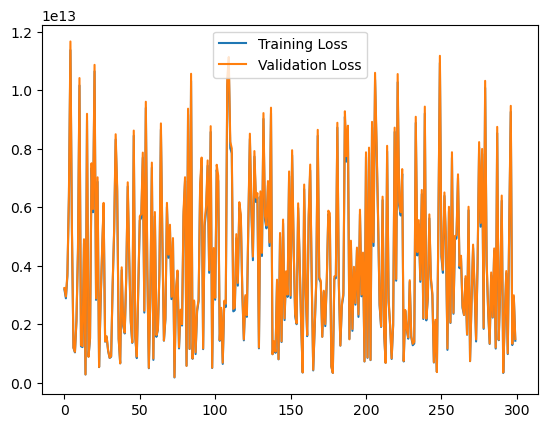

RMSE score on test data: 1411997102619.439
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.001


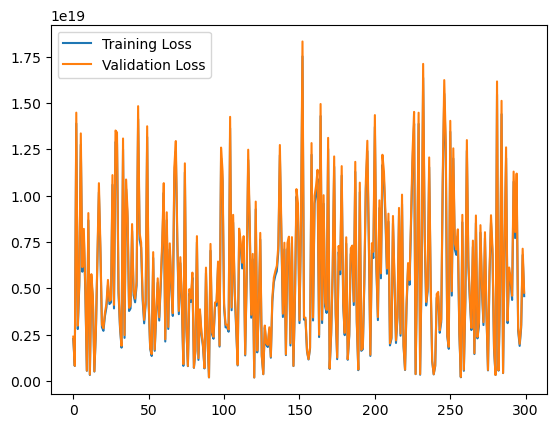

RMSE score on test data: 4.524759715010909e+18
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.01


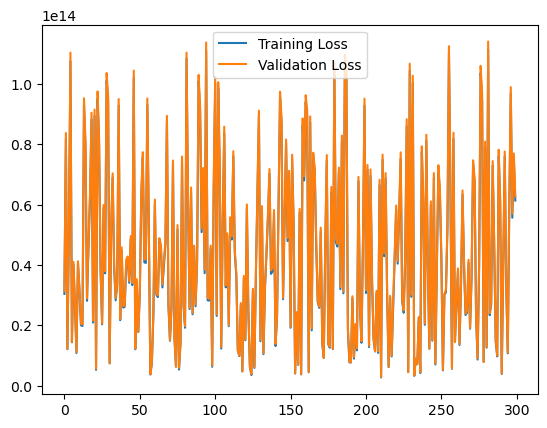

RMSE score on test data: 60805219622965.67
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.01


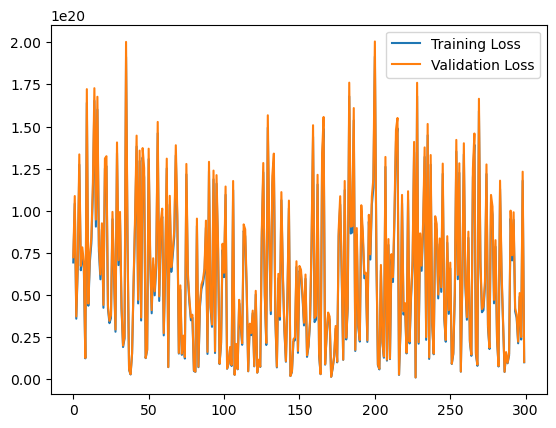

RMSE score on test data: 1.0193444668765428e+19
Polynomial degree =: 2
Penalty: l1
Learning Rate: 1e-06


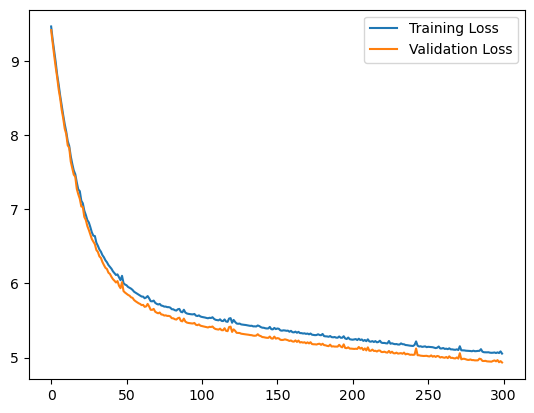

RMSE score on test data: 4.966885500381611
Polynomial degree =: 5
Penalty: l1
Learning Rate: 1e-06


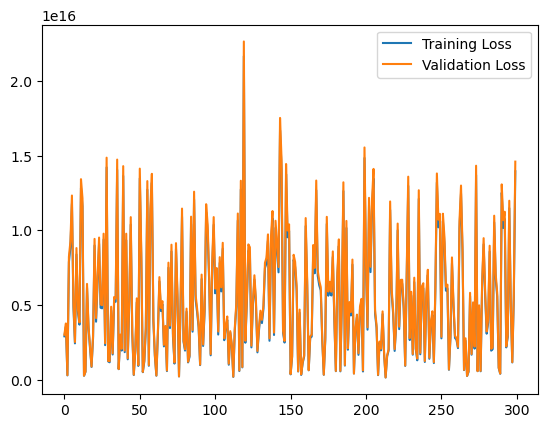

RMSE score on test data: 1.3761579679256478e+16
Polynomial degree =: 2
Penalty: l1
Learning Rate: 1e-05


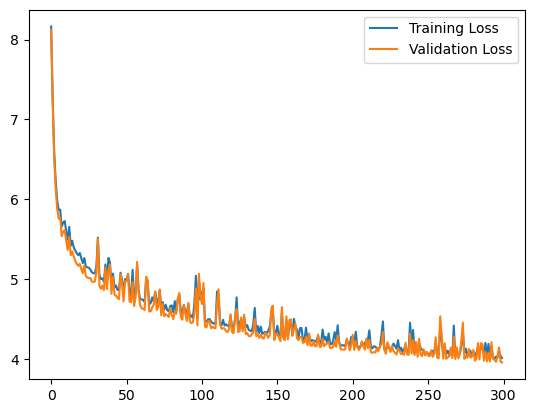

RMSE score on test data: 3.8999474542505728
Polynomial degree =: 5
Penalty: l1
Learning Rate: 1e-05


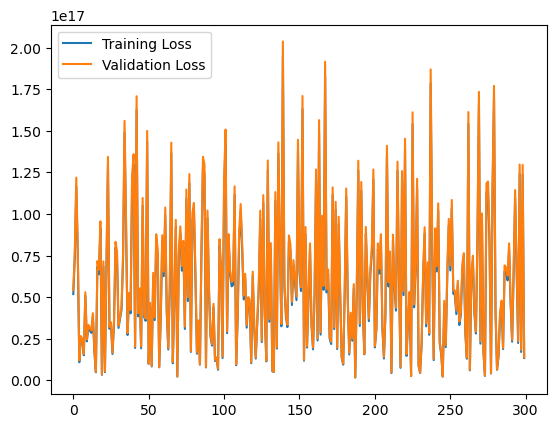

RMSE score on test data: 1.2971620554358054e+16
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.0001


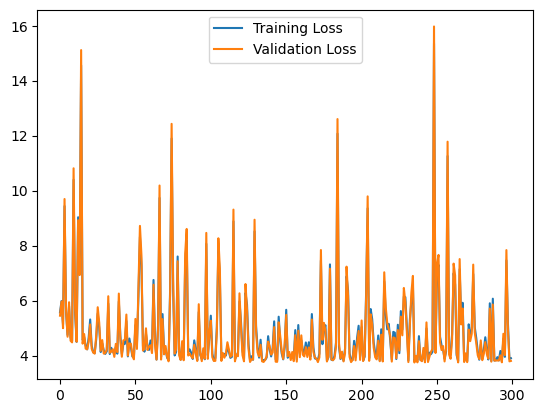

RMSE score on test data: 3.770076874012981
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.0001


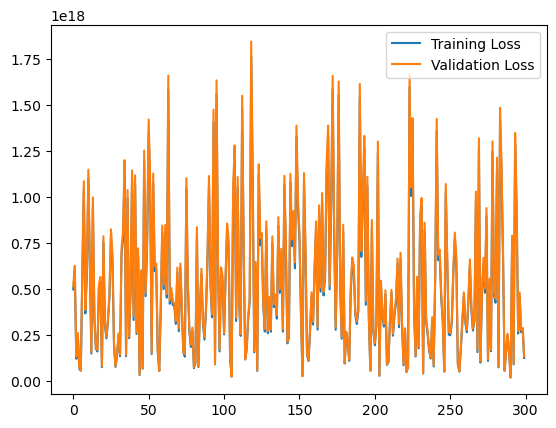

RMSE score on test data: 1.2534510663731338e+17
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.001


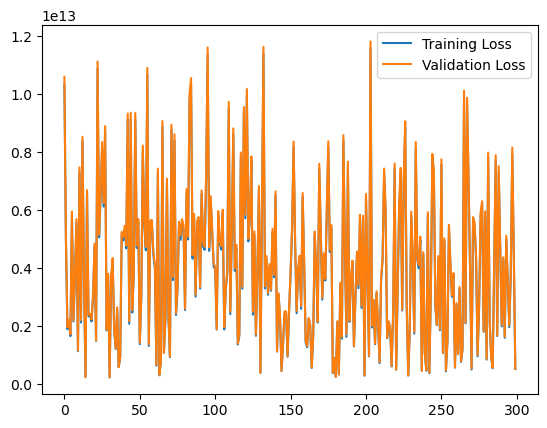

RMSE score on test data: 493769917474.58276
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.001


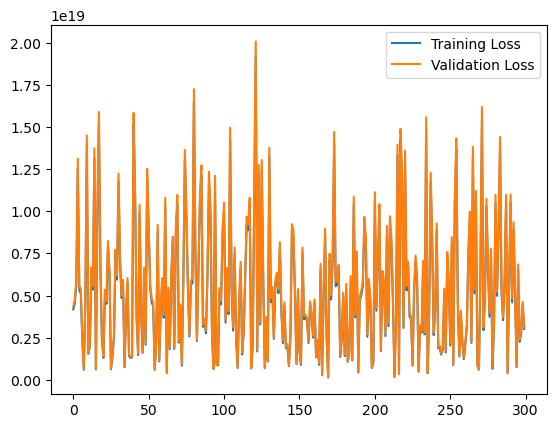

RMSE score on test data: 3.0020947762949115e+18
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.01


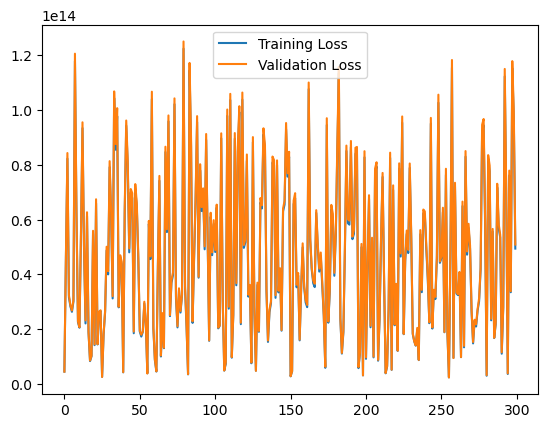

RMSE score on test data: 48963725981110.8
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.01


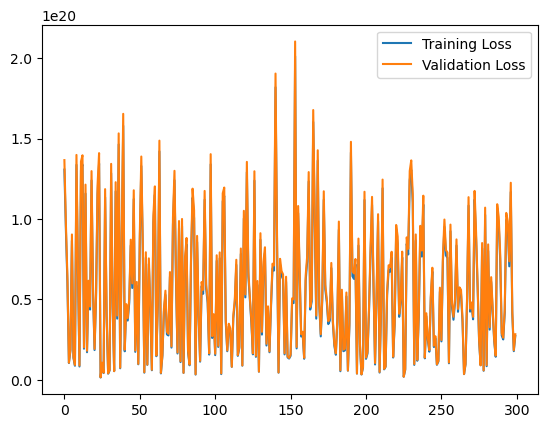

RMSE score on test data: 2.7161616109313794e+19
Polynomial degree =: 2
Penalty: l2
Learning Rate: 1e-06


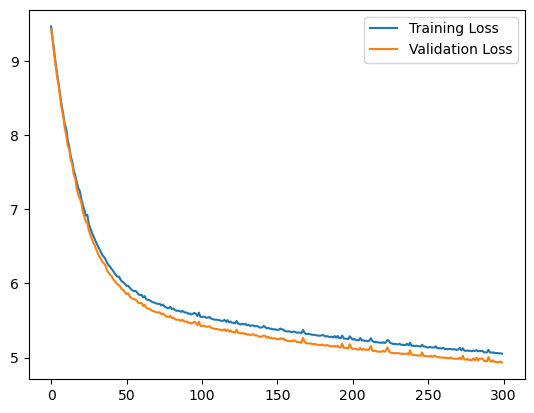

RMSE score on test data: 4.967026929673772
Polynomial degree =: 5
Penalty: l2
Learning Rate: 1e-06


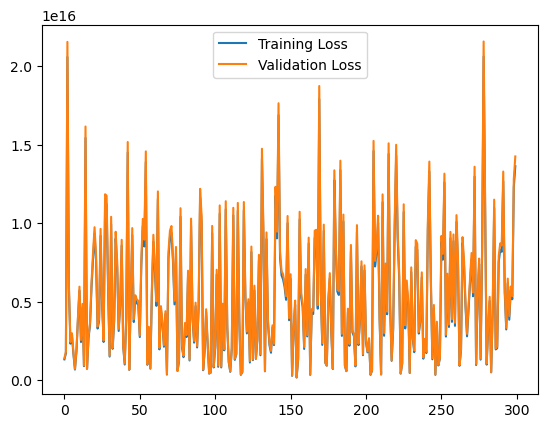

RMSE score on test data: 1.344293853433627e+16
Polynomial degree =: 2
Penalty: l2
Learning Rate: 1e-05


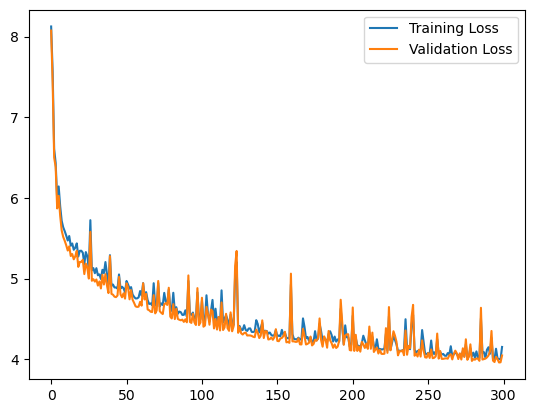

RMSE score on test data: 4.02519366708091
Polynomial degree =: 5
Penalty: l2
Learning Rate: 1e-05


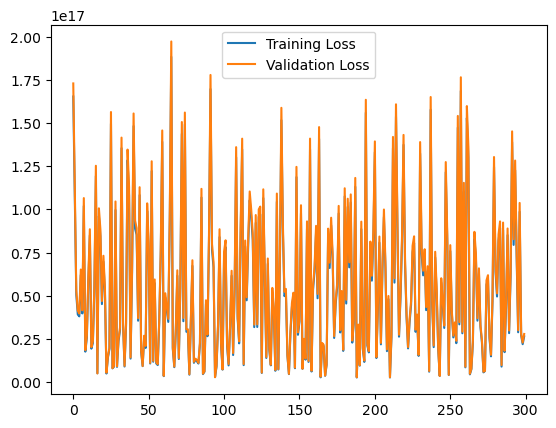

RMSE score on test data: 2.630551590131597e+16
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.0001


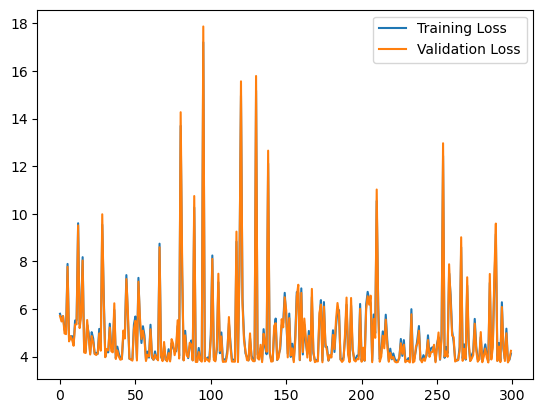

RMSE score on test data: 3.9898329295262225
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.0001


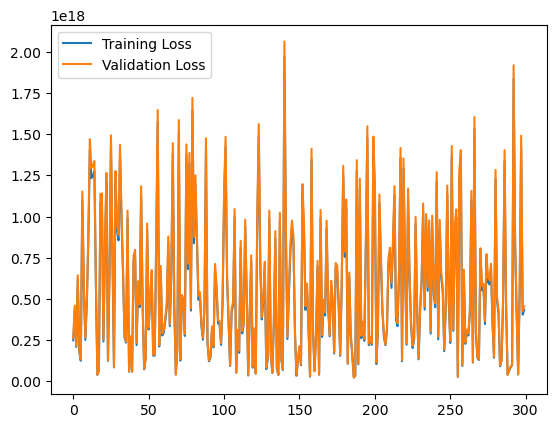

RMSE score on test data: 4.283540782282905e+17
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.001


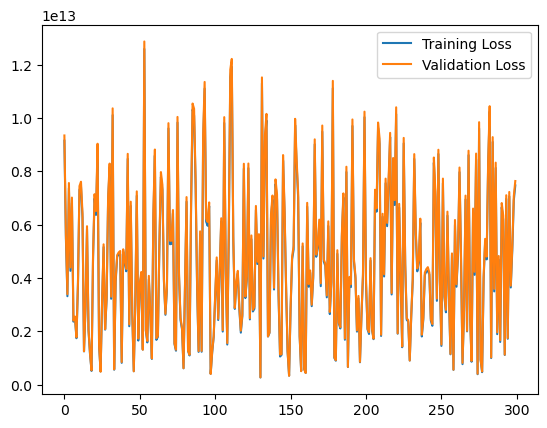

RMSE score on test data: 7430565722525.234
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.001


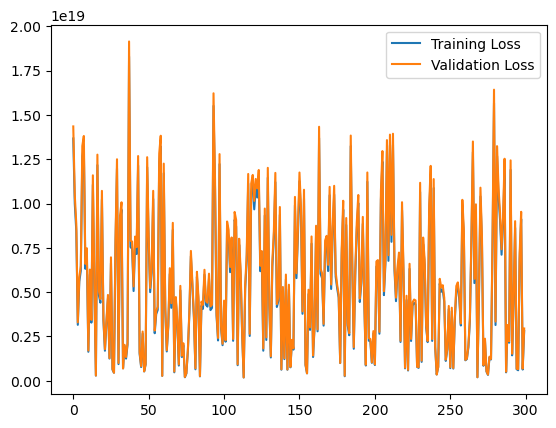

RMSE score on test data: 2.7507114710881167e+18
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.01


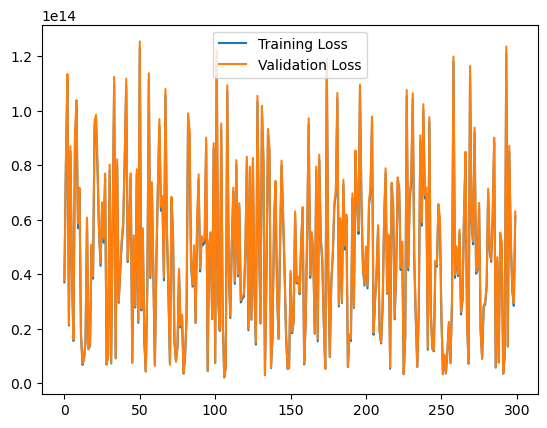

RMSE score on test data: 60868520316317.58
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.01


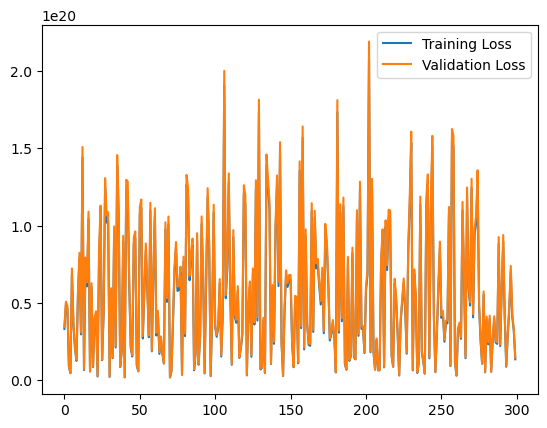

RMSE score on test data: 1.286544185438726e+19


In [32]:
# Polynomial regression using SGD
sgd_pen = [None,'l1','l2']
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300
pol_deg = [2,5]
for penalty in sgd_pen:
    for lr in learning_rates:
        for pol in pol_deg:
            print("Polynomial degree =:", pol)
            print("Penalty:", penalty)
            print("Learning Rate:", lr)
            train_loss = []
            val_loss = []
            sgd_obj = SGDRegressor(penalty=penalty, learning_rate='constant', eta0=lr, max_iter=n_epochs)
            poly_features = PolynomialFeatures(degree=pol, include_bias=False)
            X_train_poly = poly_features.fit_transform(x_train_2)
            X_val_poly = poly_features.transform(x_val)

            for epoch in range(n_epochs):
                sgd_obj.partial_fit(X_train_poly, y_train_2)
                y_pred_train = sgd_obj.predict(X_train_poly)
                y_pred_val = sgd_obj.predict(X_val_poly)
                train_loss.append(np.sqrt(mse(y_pred_train,y_train_2)))
                val_loss.append(np.sqrt(mse(y_pred_val,y_val)))

            plt.plot(range(n_epochs), train_loss, label = "Training Loss")
            plt.plot(range(n_epochs), val_loss, label = "Validation Loss")
            plt.legend()
            plt.show()

            # Calculate and print RMSE score between y_pred_val and y_test
            y_pred_test = sgd_obj.predict(poly_features.transform(x_test_2))
            rmse = np.sqrt(mse(y_pred_test, y_test_2))
            metric_dict['Polynomial degree for SGD= '+str(pol)+' Learning_rate= '+str(lr)+' and penalty_term= '+str(penalty)] = rmse
            print("RMSE score on test data:", rmse)


Degree: 2
0
Train error: 3.9809792086515667
Validation error: 4.038732445923404
1
Train error: 4.0518261122264905
Validation error: 3.793469635660633
2
Train error: 3.949243056023887
Validation error: 4.126506536817681
3
Train error: 4.003997486058499
Validation error: 3.9503997285724317


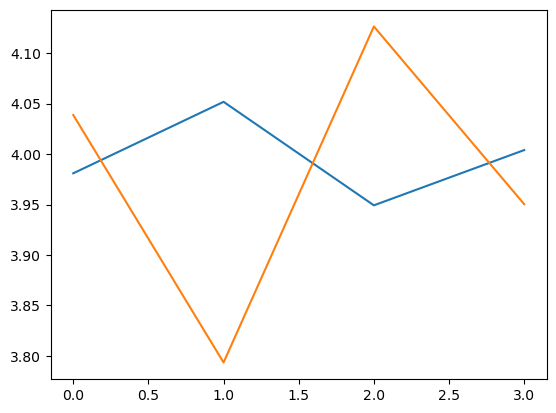



Degree: 5
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.673e+03, tolerance: 5.971e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e+03, tolerance: 2.052e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.5554164465245663
Validation error: 3.5015473359588265
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.990e+03, tolerance: 6.179e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.64850845473893
Validation error: 3.2528212536503998
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.639e+03, tolerance: 5.880e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+03, tolerance: 2.163e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.5408035796202677
Validation error: 3.5351264253986843
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.552e+03, tolerance: 6.105e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.5533565411661088
Validation error: 3.5441836067983408


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e+03, tolerance: 1.902e+00
  model = cd_fast.enet_coordinate_descent(


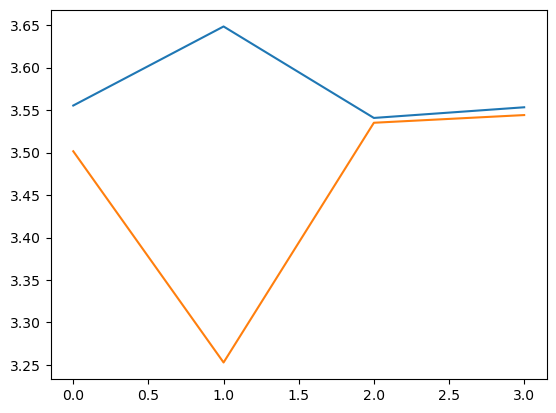



Degree: 10
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.136e+03, tolerance: 5.971e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+03, tolerance: 2.052e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.062281414024047
Validation error: 2.727345524226253
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.464e+03, tolerance: 6.179e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.1646464802205694
Validation error: 2.5195633553373007
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.142e+03, tolerance: 5.880e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+03, tolerance: 2.163e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.061226395047278
Validation error: 2.6725597341931024
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e+03, tolerance: 6.105e+00
  model = cd_fast.enet_coordinate_descent(


Train error: 3.0543335150222743
Validation error: 2.7771198215282


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+03, tolerance: 1.902e+00
  model = cd_fast.enet_coordinate_descent(


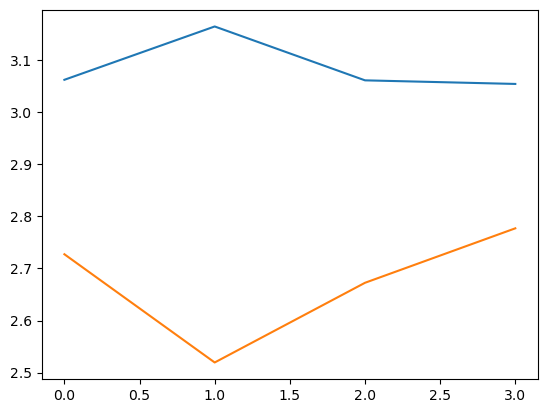

In [33]:
# Polynomial regression using elastic net

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    el_net = ElasticNet()  
    for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
        print(cnt)
        x = x_train_2[var[0],:]
        y = y_train_2[var[0]]
        x_val = x_train_2[var[1],:]
        y_val = y_train_2[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        el_net.fit(X_poly_1, y)
        y_pred_train=el_net.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        el_net.fit(X_poly_2, y_val)
        y_pred_val=el_net.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test_2)
        y_pred_test = el_net.predict(X_test_poly)
        metric_dict['Polynomial degree for elastic net= '+str(r)] = np.sqrt(mse(y_pred_test,y_test_2))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

#### Answer:- The results show that as the degree of the polynomial increases, the training error decreases, but the validation error may start to increase, indicating overfitting.

#### In the case of polynomial regression using ridge and lasso, regularization has been applied to prevent overfitting. The results show that both ridge and lasso help to reduce the validation error compared to polynomial regression without regularization.

#### It is worth noting that for some of the results, the validation error is much larger than the train error, which could indicate that the model is overfitting the training data. In such cases, it may be necessary to further tune the hyperparameters of the model or collect more data to improve the performance.

### Part 7

#### Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

In [34]:
# Making predictions on the test dataset. We have used all of our previusly trained models to predict on the test dataset and 
# calculated the RMSE scores.

ridge = Ridge()
for cnt,var in enumerate(kf.split(x_train_2,y_train_2)):
    x = x_train_2[var[0],:]
    y = y_train_2[var[0]]
    x_val = x_train_2[var[1],:]
    y_val = y_train_2[var[1]]
    ridge.fit(x, y)
    y_pred_train = ridge.predict(x)
    ridge.fit(x_val, y_val)
    y_pred_val = ridge.predict(x_val)

In [35]:
y_pred_test = ridge.predict(x_test_2)
print("Error:",np.sqrt(mse(y_pred_test,y_test_2)))

Error: 3.6959852293570363


In [36]:
# Now we will look at the RMSE scores for all the models on our test dataset

metric_dict

{'Linear regression': 3.693685608175782,
 'SGD with learning rate =1e-06': 3.96966749079844,
 'SGD with learning rate =1e-05': 3.7670963034078917,
 'SGD with learning rate =0.0001': 3.689297182286318,
 'SGD with learning rate =0.001': 3.9322983646063134,
 'SGD with learning rate =0.01': 4.374503043689119,
 'SGD with learning rate =1e-06 and penalty_factor =None': 3.9696651820128945,
 'SGD with learning rate =1e-05 and penalty_factor =None': 3.767312827919267,
 'SGD with learning rate =0.0001 and penalty_factor =None': 3.699389148877477,
 'SGD with learning rate =0.001 and penalty_factor =None': 3.7830674990488733,
 'SGD with learning rate =0.01 and penalty_factor =None': 3.836960346031612,
 'SGD with learning rate =1e-06 and penalty_factor =l1': 3.9696603920934166,
 'SGD with learning rate =1e-05 and penalty_factor =l1': 3.768378646001259,
 'SGD with learning rate =0.0001 and penalty_factor =l1': 3.7035761649960635,
 'SGD with learning rate =0.001 and penalty_factor =l1': 3.72745277326

#### Answer: Polynomial degree for Elastic net= 5 works best on our test data, since they have the lowest RMSE scores.
#### We can try and add more data points so that we have a more robust understanding of the dataset. More amount of data always leads to better training and better results. We can preprocess the data further and try removing skewness or imputing null values. We can do in-depth EDA to find which features affect the target variable more and just feed those features into our model. These are some ways by which we can improve the efficiency of our models.